In [1]:
#importing the libraries for matrix and dataframe handling, plotting, etc 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing the other miscellaneous libraries used 
import re
import warnings
warnings.filterwarnings("ignore")

# importing the NLTK related libraries and functions along with evaluation metircs
import nltk
import string
nltk.download("all")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Functions involving the Training and Evaluation of several Machine Learning Models

For each of the 6 ML algorithms stated, functions are created. The following are the steps that are performed across all the functions:

Splitting of the dataset randomly into training and test dataset with the help of train_test_split function

Bag of Words model of the training dataset is created to represent the text data into numbers that can be interpreted by the model

Then these are converted to he corresponding TF-IDF vectors (as these perform better in terms of ML Models)

Fitting the training dataset to the Machine Learning Model
Predicting the Output for the testing Dataset

Calculating the Accuracy of the Predicted categories as compared to the actual categories in the testing dataset

Evaluation Metrics such as Confusion Matrix and Classification Report are printed to get an in depth idea about the accuracy of our model

In [3]:
#For FLipkart Dataset 
# Reading the Imbalanced Dataset

unbalanced_df = pd.read_csv('/content/drive/MyDrive/Flipkart_unbalanced_products.csv')
unbalanced_df.head(15)

,Unnamed: 0,Product name in Flipkart,product_category_tree,Retail Price in Flipkart,Discounted Price in Flipkart,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
0,0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.143750,410,key feature alisha solid woman cycling short c...
1,1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen,1,0.113814,4433,fabhomedecor fabric double sofa bed finish col...
2,2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear,1,0.027778,650,key feature belly sandal wedge heel casualsaw ...
3,3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.122917,403,key feature alisha solid woman cycling short c...
4,4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,Specifications of Sicons All Purpose Arnica Do...,Sicons,petsupplies,1,0.050000,248,specification sicons purpose arnica dog shampo...
5,5,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",430.0,430.0,Key Features of Eternal Gandhi Super Series Cr...,Eternal Gandhi,noise,0,0.322727,872,key feature eternal gandhi super series crysta...
6,6,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",1199.0,479.0,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.127778,416,key feature alisha solid woman cycling short c...
7,7,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen,1,0.135063,4385,fabhomedecor fabric double sofa bed finish col...
8,8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",699.0,349.0,"Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,footwear,1,-0.032143,428,key feature dilli bazaaar belly corporate casu...
9,9,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",1199.0,479.0,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.098333,419,key feature alisha solid woman cycling short c...


In [4]:
#helper dictionaries created which are later used to manipulate the testing output into suitable form before plotting the ROC Curves

category_mapping = {  0	: "homefurnishing/kitchen",
                      1	: "clothing",
                      2	: "jewellery",
                      3	: "personalaccessories",	
                      4	: "electronics",	
                      5	: "footwear",	
                      6	: "automotive",	
                      7	: "toys&schoolsupplies",
                      8	: "tools&hardware",	
                      9	: "babycare",	
                      10 : "sports&fitness",	
                      11 : "petsupplies",	
                      12 : "ebooks"	}

reverse_category_mapping = {"homefurnishing/kitchen":0,
                            "clothing":1,
                            "jewellery":2,
                            "personalaccessories":3,	
                            "electronics":4,	
                            "footwear":5,	
                            "automotive":6,	
                            "toys&schoolsupplies":7,
                            "tools&hardware":8,	
                            "babycare":9,	
                            "sports&fitness":10,	
                            "petsupplies":11,	
                            "ebooks":12}

In [5]:
#dropping the noise in the dataset by considering only the above mentioned categories

print(unbalanced_df.shape)
unbalanced_df = unbalanced_df[unbalanced_df["main_category"]==1]
print(unbalanced_df.shape)

(17539, 12)
(17209, 12)


In [6]:
#1) Logistic Regression (Binary Classification Method)
def logistic_regression(x,y):
  from sklearn.linear_model import LogisticRegression

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  lr_model = LogisticRegression()
  lr_model.fit(x_train,y_train)
  lr_predict = lr_model.predict(x_test)
  lr_pred_prob = lr_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, lr_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test,lr_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test,lr_predict))

  return y_test, lr_predict, lr_pred_prob

In [7]:
#2) Logistic Regression (Multiclass Classification Method)

def logistic_regression_multiclass(x,y):
  from sklearn.linear_model import LogisticRegression

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  reg = 0.1

  #fitting the training dataset to the multiclass classification Logistic Regression model
  lr_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=1000).fit(x_train,y_train)
  lr_predict = lr_model.predict(x_test)
  lr_pred_prob = lr_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, lr_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test,lr_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test,lr_predict))

  return y_test, lr_predict, lr_pred_prob

In [8]:
#3) Multinomial Naive Bayes Classifier
def naive_bayes(x,y):
  from sklearn.naive_bayes import MultinomialNB

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the tarining dataset to the model
  nb_model = MultinomialNB()
  nb_model.fit(x_train,y_train)
  nb_predict = nb_model.predict(x_test)
  nb_pred_prob = nb_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, nb_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test,nb_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test,nb_predict))

  return y_test, nb_predict, nb_pred_prob

In [9]:
#4) Linear Support Vector Machine
def linear_svm(x,y):
  from sklearn.svm import LinearSVC

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  svc_model = LinearSVC(random_state=42, max_iter=2000)
  svc_model.fit(x_train,y_train)
  svc_predict = svc_model.predict(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, svc_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test,svc_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test,svc_predict))

  return y_test, svc_predict

In [10]:
#5) Decision Trees Classifier
def decision_trees(x,y):
  from sklearn.tree import DecisionTreeClassifier

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  dtree_model = DecisionTreeClassifier(max_depth = 30)
  dtree_model.fit(x_train,y_train)
  dtree_predict = dtree_model.predict(x_test)
  dtree_pred_prob = dtree_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, dtree_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test,dtree_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test,dtree_predict))

  return y_test, dtree_predict, dtree_pred_prob

In [11]:
#6) Random Forest Classifier
def random_forest(x,y):
  from sklearn.ensemble import RandomForestClassifier

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  rfc_model = RandomForestClassifier(random_state=42, max_depth = 30)
  rfc_model.fit(x_train,y_train)
  rfc_predict = rfc_model.predict(x_test)
  rfc_pred_prob = rfc_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, rfc_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test, rfc_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test, rfc_predict))

  return y_test, rfc_predict, rfc_pred_prob

In [12]:
#7) K Nearest Neighbours
def k_nearest_neighbours(x,y):
  from sklearn.neighbors import KNeighborsClassifier

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  knn_model = KNeighborsClassifier(algorithm='brute')
  knn_model.fit(x_train,y_train)
  knn_predict = knn_model.predict(x_test)
  knn_pred_prob = knn_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, knn_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test, knn_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test, knn_predict))

  return y_test, knn_predict, knn_pred_prob

In [13]:
#Plotting the ROC Curves for Multiclass Logistic Regression

def plot_roc_curve(y_test, y_pred, no_categories = 13, lw=2):

  #calculating the ROC curve and area for each class
  false_positive_rate = dict()
  true_positive_rate = dict()

  for i in range(no_categories):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test[:,i], y_pred[:, i])

  #Compute micro-average ROC curve and area under the curve
  false_positive_rate["micro"], true_positive_rate["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())

  #plotting the ROC Curves for each of the 13 main categories in our model
  for category in range(no_categories):
    plt.figure()
    plt.plot(false_positive_rate[category], 
             true_positive_rate[category], 
             color='deeppink',
             lw=lw)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Primary Category: ' + category_mapping[category])
  plt.show()

In [14]:
# the cleaned product description corresponds to the x value 
x = unbalanced_df['cleaned_desc']
# the 13 labels/ product categories mentioned above correspond to the y value
y = unbalanced_df['primary_categories']

In [15]:
#1) Evaluation using the Logistic Regression Model

print("********** LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression(x,y)

********** LOGISTIC REGRESSION **********
Validation Accuracy:  0.9654270772806508


*********** CONFUSION MATRIX **************
[[ 200    0    1    0    2    0    0    0    0    0    0    0    0]
 [   0   56    1    0    0    0    6    0    2    0    1    0    0]
 [   0    7 1096    0    0    0    2    2    1    0    1    0    0]
 [   0    0    0    1    1    0    2    0    0    0    0    0    0]
 [   2    0    0    0  250    0    0    0    0    0    0    0    0]
 [   0    0    2    0    2  198    0    0    0    0    0    0    0]
 [   0    9    1    0   12    2  412    3    1    0    0    5    8]
 [   0    0    0    0    4    0    0  585    1    0    0    0    0]
 [   0    0    3    0    1    2    3    2  320    0    2    0    2]
 [   0    0    0    0    0    0    0    0    0    5    0    0    0]
 [   0    0    0    0    0    0    1    0    4    0   25    0    0]
 [   2    0    0    0    1    0    1    0    1    0    0   58    1]
 [   3    0    0    0    1    1    2    0    4    0    

In [16]:
#2) Evaluation using the Multiclass Variant of Logistic Regression

print("********** MULTICLASS LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression_multiclass(x,y)

********** MULTICLASS LOGISTIC REGRESSION **********
Validation Accuracy:  0.97356188262638


*********** CONFUSION MATRIX **************
[[ 202    0    0    0    1    0    0    0    0    0    0    0    0]
 [   0   58    1    0    0    0    4    0    2    0    0    0    1]
 [   0    7 1097    0    0    0    1    2    1    0    1    0    0]
 [   0    0    0    2    0    0    2    0    0    0    0    0    0]
 [   2    0    0    0  250    0    0    0    0    0    0    0    0]
 [   0    0    0    0    2  200    0    0    0    0    0    0    0]
 [   1    9    1    0    8    0  419    2    1    0    0    4    8]
 [   0    0    0    0    3    0    0  586    1    0    0    0    0]
 [   0    1    2    0    1    1    3    2  322    0    1    0    2]
 [   0    0    0    0    0    0    0    0    0    5    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0   29    0    0]
 [   1    0    0    0    0    0    1    0    1    0    0   61    0]
 [   3    0    0    0    1    0    1    0    3

In [17]:
#Plotting the ROC Curves for each of the 13 categories and calculating the AUC score for them
print("TESTING LABELS: {}".format(y_test.shape))
print("PREDICTED LABELS: {}".format(lr_predict.shape))
print("PROBABILITY OF THE PREDICTED LABELS: {}".format(lr_pred_prob.shape))

TESTING LABELS: (3442,)
PREDICTED LABELS: (3442,)
PROBABILITY OF THE PREDICTED LABELS: (3442, 13)


In [18]:
#converting the Test Classes (y_test) from Pandas Series object to Numpy array
y_test = y_test.to_numpy()
length = y_test.shape

#conerting the string classes into the respective numbers based on their mapping as described previously
for i in range(length[0]):
  y_test[i] = reverse_category_mapping[y_test[i]]
  lr_predict[i] = reverse_category_mapping[lr_predict[i]]

print("The last 10 actual labels: {}".format(y_test[:10]))
print("The last 10 predicted labels: {}".format(lr_predict[:10]))

The last 10 actual labels: [1 4 6 1 1 1 4 1 2 2]
The last 10 predicted labels: [1 4 6 1 1 1 4 1 2 2]


In [19]:
#converting the actual test labels into a binary 2d numpy array according to their classes

n_classes = 13
temp_array = [[0 for i in range(n_classes)] for i in range(length[0])]

j=0
for i in y_test:
  temp_array[j][i] = 1
  j+=1

#converting the temporary array into a numpy array 
y_test = np.array(temp_array)
print(y_test)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


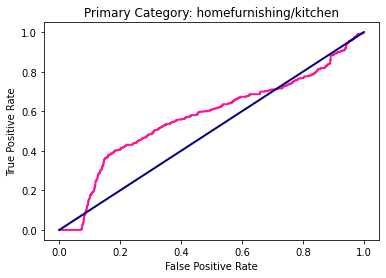

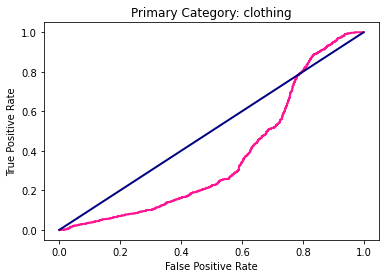

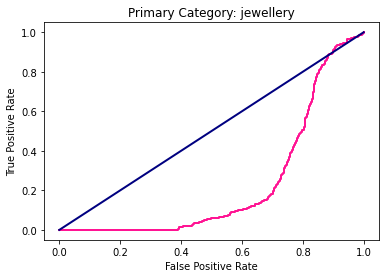

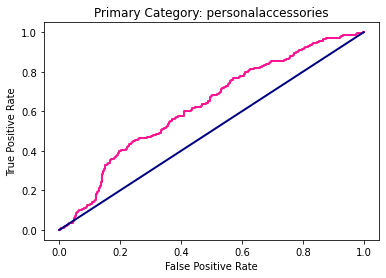

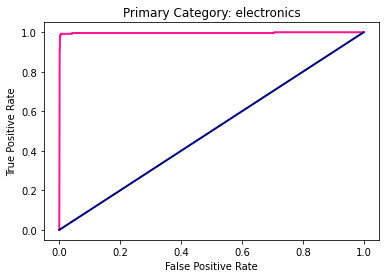

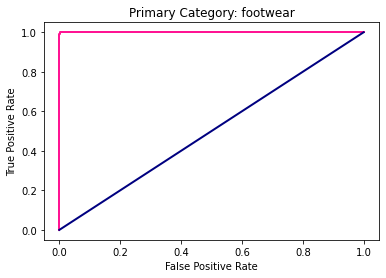

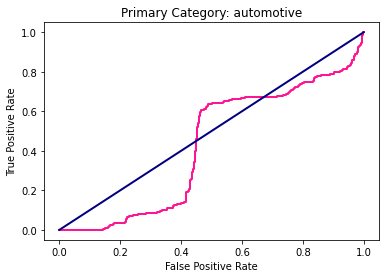

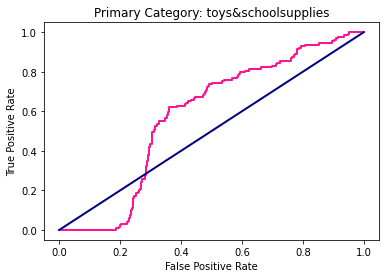

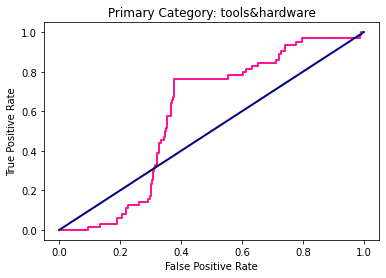

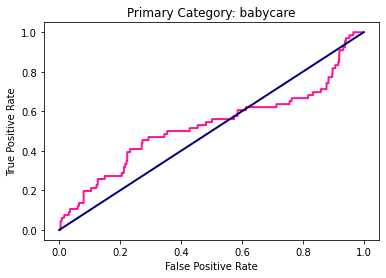

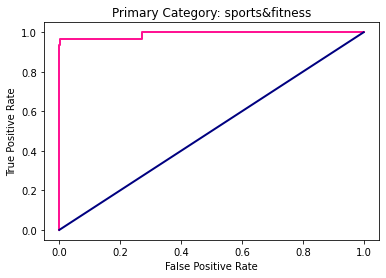

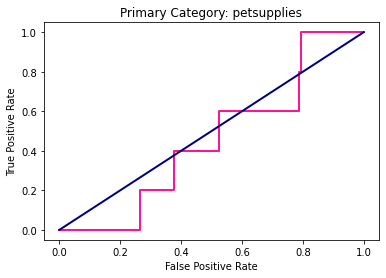

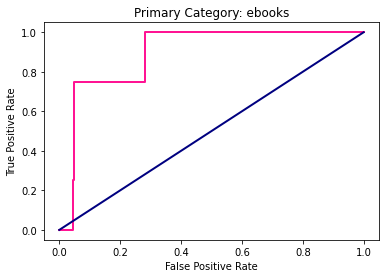

In [20]:
plot_roc_curve(y_test, lr_pred_prob)

In [21]:
#Average Area Under the Curve

auc = roc_auc_score(y_test, lr_pred_prob, multi_class='ovr')
print('Average AUC score for all the categories is {}'.format(auc))

Average AUC score for all the categories is 0.634665475135841


In [22]:
#3) Multinomial Naive Bayes Classifier

print("********* NAIVE BAYES CLASSIFIER *********")
y_test, nb_predict, nb_pred_prob = naive_bayes(x,y)

********* NAIVE BAYES CLASSIFIER *********
Validation Accuracy:  0.909645554909936


*********** CONFUSION MATRIX **************
[[ 188    0    2    0    4    0    7    0    2    0    0    0    0]
 [   0    0   40    0    0    0   24    1    1    0    0    0    0]
 [   0    0 1107    0    0    0    0    2    0    0    0    0    0]
 [   0    0    0    0    1    0    2    0    1    0    0    0    0]
 [   1    0    0    0  229    0    0   19    3    0    0    0    0]
 [   0    0    9    0    0  184    1    7    1    0    0    0    0]
 [   0    0    5    0    8    0  431    6    3    0    0    0    0]
 [   0    0    7    0    0    0    1  582    0    0    0    0    0]
 [   0    0   15    0    1    0   13   12  294    0    0    0    0]
 [   0    0    0    0    0    0    5    0    0    0    0    0    0]
 [   1    0    5    0    0    0    8    0   15    0    1    0    0]
 [   0    0    0    0    2    0   13    0    0    0    0   49    0]
 [   3    0    2    0    2    0   29   21    6    0    

In [23]:
#4)Linear Support Vector Machine
print("********* LINEAR SVM *********")
y_test, svm_predict = linear_svm(x,y)

********* LINEAR SVM *********
Validation Accuracy:  0.9799535153980244


*********** CONFUSION MATRIX **************
[[ 202    0    0    0    1    0    0    0    0    0    0    0    0]
 [   0   57    2    0    0    0    4    0    2    0    0    0    1]
 [   0    4 1101    0    0    0    0    3    1    0    0    0    0]
 [   0    0    0    1    1    0    2    0    0    0    0    0    0]
 [   3    0    0    0  249    0    0    0    0    0    0    0    0]
 [   0    0    0    0    2  200    0    0    0    0    0    0    0]
 [   1    3    1    0    5    0  437    0    2    0    0    1    3]
 [   0    0    0    0    2    0    0  587    1    0    0    0    0]
 [   1    0    2    0    1    1    4    2  323    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    5    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0   29    0    0]
 [   0    0    0    0    0    0    3    0    1    0    0   60    0]
 [   3    0    0    0    0    0    0    0    3    0    1    0  122

In [24]:
#5) Decision Trees Classifier

print("********** DECISION TREES CLASSIFIER *************")
y_test, dtree_predict, dtree_pred_prob = decision_trees(x,y)

********** DECISION TREES CLASSIFIER *************
Validation Accuracy:  0.7292271934921557


*********** CONFUSION MATRIX **************
[[ 176    0    1    0   10    0   11    0    2    0    2    1    0]
 [   0   34    6    0   16    1    9    0    0    0    0    0    0]
 [   1    8 1053    0    8    8   20    4    7    0    0    0    0]
 [   0    0    0    0    2    1    1    0    0    0    0    0    0]
 [   2    0   15    0   98    0   20    0   87    0    0    0   30]
 [   0    0    6    0    0  130    4    0   62    0    0    0    0]
 [   4    1  109    0   59    4  265    3    4    0    2    1    1]
 [   0    2    3    0    0    5   16  359  200    0    1    0    4]
 [   2    0   13    0   13   12   21    2  256    0   15    0    1]
 [   0    0    2    0    0    0    1    0    0    1    0    1    0]
 [   0    0    6    0    2    0   11    0    0    0   11    0    0]
 [   1    0    5    0    3    0    6    0    0    0    0   49    0]
 [   2    1   19    0    8    2   13    0    6

In [25]:
#6) Random Forest Classifier

print("********** RANDOM FOREST CLASSIFIER *************")
y_test, rfc_predict, rfc_pred_prob = random_forest(x,y)

********** RANDOM FOREST CLASSIFIER *************
Validation Accuracy:  0.9209761766414875


*********** CONFUSION MATRIX **************
[[ 193    0    1    0    2    0    6    0    1    0    0    0    0]
 [   0    3   41    0    0    0   20    1    1    0    0    0    0]
 [   0    0 1104    0    0    0    2    3    0    0    0    0    0]
 [   0    0    1    0    0    0    3    0    0    0    0    0    0]
 [   2    0    5    0  221    0    9   13    2    0    0    0    0]
 [   0    0   18    0    0  181    0    3    0    0    0    0    0]
 [   0    0   13    0    7    0  427    5    1    0    0    0    0]
 [   0    0    1    0    0    0    1  588    0    0    0    0    0]
 [   0    0   20    0    1    6   12    8  288    0    0    0    0]
 [   0    0    1    0    0    0    2    0    0    2    0    0    0]
 [   0    0    7    0    0    0    4    1    0    0   18    0    0]
 [   0    0    2    0    1    0    7    0    1    0    0   53    0]
 [   2    0    3    0    0    1   20    3    8 

In [26]:
#7) K Nearest Neighbours

print("********** K NEAREST NEIGHBOURS *************")
y_test, knn_predict, knn_pred_prob = k_nearest_neighbours(x,y)

********** K NEAREST NEIGHBOURS *************
Validation Accuracy:  0.9564206856478792


*********** CONFUSION MATRIX **************
[[ 199    0    0    0    1    0    2    0    1    0    0    0    0]
 [   0   48    8    0    0    0    6    0    3    0    1    0    0]
 [   0    7 1099    0    0    0    0    2    1    0    0    0    0]
 [   0    0    1    1    0    0    0    1    1    0    0    0    0]
 [   3    0    0    0  230   16    0    1    0    0    0    0    2]
 [   1    0    2    0    0  197    0    1    1    0    0    0    0]
 [   4    4    1    0    7    5  423    6    0    0    0    1    2]
 [   0    0    1    0    0    0    1  586    2    0    0    0    0]
 [   1    0    3    0    1   11    3    4  311    0    0    0    1]
 [   0    0    0    0    0    0    0    1    0    4    0    0    0]
 [   1    1    0    0    0    1    0    1    3    0   23    0    0]
 [   1    0    0    0    1    0    3    1    1    0    0   57    0]
 [   5    0    0    0    1    2    1    1    4    0

In [27]:
#Reading the Balanced Dataset created using the Oversampling 
oversampled_df = pd.read_csv("/content/drive/MyDrive/Flipkart_oversampling_balanced_products.csv")
oversampled_df

,Unnamed: 0,Product name in Flipkart,product_category_tree,Retail Price in Flipkart,Discounted Price in Flipkart,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
0,5417,Alex's Barbie Series Barbie Doll Art Plastic P...,"[""Toys & School Supplies >> School Supplies >>...",799.0,299.0,Flipkart.com: Buy Alex's Barbie Series Barbie ...,NaN,toys&schoolsupplies,1,0.225000,195,flipkartcom buy ale barbie series barbie doll ...
1,13643,Platignum Carnaby Street Ball Pen,"[""Pens & Stationery >> Pens >> Ball Pens >> Pl...",695.0,695.0,Platignum Carnaby Street Ball Pen (Blue)\n ...,Platignum,toys&schoolsupplies,1,0.362835,1420,platignum carnaby street ball pen blue price c...
2,6316,Aardee Varsity Design Art Thick fabric Pencil Box,"[""Toys & School Supplies >> School Supplies >>...",350.0,299.0,Aardee Varsity Design Art Thick fabric Pencil ...,NaN,toys&schoolsupplies,1,0.016667,207,aardee varsity design art thick fabric pencil ...
3,5429,Outshiny Eagle Printed Art Polyester Pencil Box,"[""Toys & School Supplies >> School Supplies >>...",199.0,149.0,Outshiny Eagle Printed Art Polyester Pencil Bo...,NaN,toys&schoolsupplies,1,0.330000,786,outshiny eagle printed art polyester pencil bo...
4,5206,Starmark BTS Flowers Art Polyester Pencil Box,"[""Toys & School Supplies >> School Supplies >>...",179.0,99.0,Flipkart.com: Buy Starmark BTS Flowers Art Pol...,NaN,toys&schoolsupplies,1,0.225000,184,flipkartcom buy starmark bts flower art polyes...
...,...,...,...,...,...,...,...,...,...,...,...,...
38995,2821,fourgee Slim Fit Women's Blue Jeans,"[""Clothing >> Women's Clothing >> Western Wear...",2000.0,619.0,Key Features of fourgee Slim Fit Women's Blue ...,fourgee,clothing,1,0.263889,711,key feature fourgee slim fit woman blue jean r...
38996,10578,Westhreads Women's Solid Casual Shirt,"[""Clothing >> Women's Clothing >> Western Wear...",799.0,499.0,Westhreads Women's Solid Casual Shirt - Buy Bl...,Relaxed,clothing,1,-0.075000,202,westhreads woman solid casual shirt buy blue w...
38997,9876,Trendz Today Casual Full Sleeve Printed Women'...,"[""Clothing >> Women's Clothing >> Western Wear...",1199.0,1199.0,Trendz Today Casual Full Sleeve Printed Women'...,NaN,clothing,1,0.093333,232,trendz today casual full sleeve printed woman ...
38998,725,Akshadha Girl's A-line Dress,"[""Clothing >> Kids' Clothing >> Girls Wear >> ...",799.0,799.0,Akshadha Girl's A-line Dress - Buy Red Akshadh...,NaN,clothing,1,0.100000,183,akshadha girl aline dress buy red akshadha gir...


In [28]:
#Evaluation of the ML Model on Balanced (Oversampling) testing dataset

x = oversampled_df['cleaned_desc']
y = oversampled_df['primary_categories']

In [29]:
#1) Evaluation using the Logistic Regression Model

print("********** LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression(x,y)

********** LOGISTIC REGRESSION **********
Validation Accuracy:  0.9748717948717949


*********** CONFUSION MATRIX **************
[[607   0   0   0   1   0   0   0   0   0   3   0   0]
 [  0 584   8   0   0   0   3   0   0   0   6   0   0]
 [  0  16 593   1   0   0   2   1   1   0   0   0   0]
 [  0   0   0 575   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0 628   0   0   0   1   0   2   0   2]
 [  0   0   0   0   0 601   0   0   0   0   1   0   0]
 [  3  31   2   1   7   0 520   3   3   5   7  13   9]
 [  0   1   1   0   1   1   0 627   0   0   3   1   0]
 [  0   2   1   0   2   1   0   2 583   0  14   0   3]
 [  0   0   0   0   0   0   0   0   0 567   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 558   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0 566   0]
 [  9   0   0   2   0   0   1   0   2   0  13   0 595]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.98      

In [30]:
#2) Evaluation using the Multiclass Variant of Logistic Regression Model

print("********** LOGISTIC REGRESSION MULTICLASS **********")
y_test, lr_predict, lr_pred_prob = logistic_regression_multiclass(x,y)

********** LOGISTIC REGRESSION MULTICLASS **********
Validation Accuracy:  0.985897435897436


*********** CONFUSION MATRIX **************
[[608   0   0   0   0   0   0   0   0   0   3   0   0]
 [  0 596   0   0   0   0   0   0   0   0   5   0   0]
 [  1  13 598   0   0   0   1   1   0   0   0   0   0]
 [  0   0   0 575   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0 631   0   0   0   0   0   2   0   1]
 [  0   0   0   0   0 601   0   0   0   0   1   0   0]
 [  1  13   3   0   5   0 554   1   1   2   5  13   6]
 [  0   1   0   0   1   0   0 630   0   0   3   0   0]
 [  1   1   0   0   2   1   0   0 592   0   9   0   2]
 [  0   0   0   0   0   0   0   0   0 567   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 558   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 567   0]
 [  9   0   0   0   0   0   0   0   0   0   0   0 613]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       

In [31]:
#Plotting the ROC Curves for each of the 13 categories and calculating the AUC score for them
print("TESTING LABELS: {}".format(y_test.shape))
print("PREDICTED LABELS: {}".format(lr_predict.shape))
print("PROBABILITY OF THE PREDICTED LABELS: {}".format(lr_pred_prob.shape))

TESTING LABELS: (7800,)
PREDICTED LABELS: (7800,)
PROBABILITY OF THE PREDICTED LABELS: (7800, 13)


In [32]:
#converting the Test Classes (y_test) from Pandas Series object to Numpy array
y_test = y_test.to_numpy()
length = y_test.shape

#conerting the string classes into the respective numbers based on their mapping as described previously
for i in range(length[0]):
  y_test[i] = reverse_category_mapping[y_test[i]]
  lr_predict[i] = reverse_category_mapping[lr_predict[i]]

print("The last 10 actual labels: {}".format(y_test[:10]))
print("The last 10 predicted labels: {}".format(lr_predict[:10]))

The last 10 actual labels: [10 11 1 5 9 3 2 8 6 0]
The last 10 predicted labels: [10 11 1 5 9 3 2 8 6 0]


In [33]:
#converting the actual test labels into a binary 2d numpy array according to their classes

n_classes = 13
temp_array = [[0 for i in range(n_classes)] for i in range(length[0])]

j=0
for i in y_test:
  temp_array[j][i] = 1
  j+=1

#converting the temporary array into a numpy array 
y_test = np.array(temp_array)
print(y_test)

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


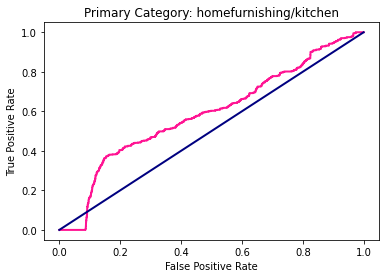

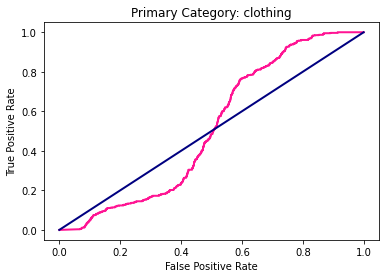

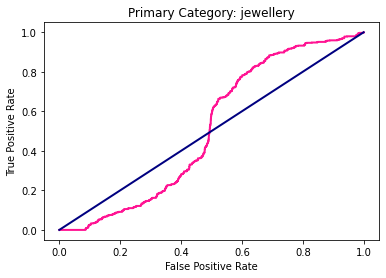

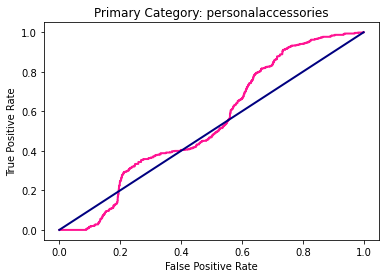

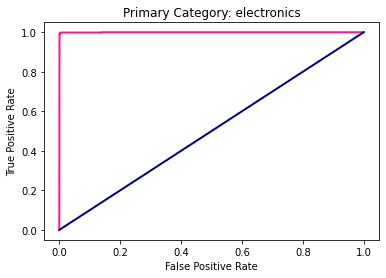

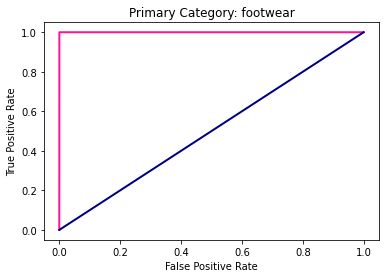

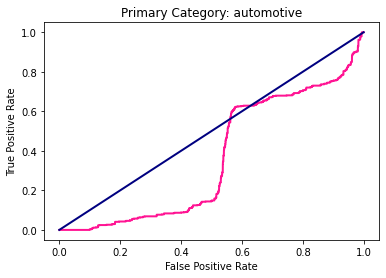

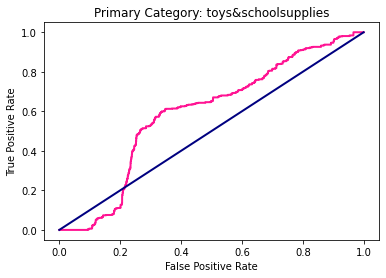

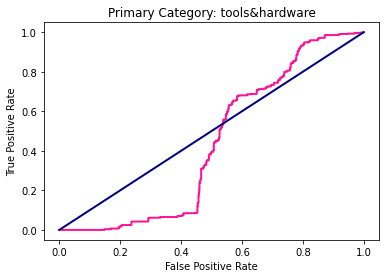

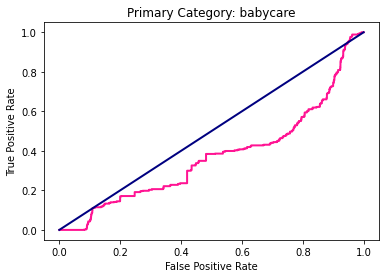

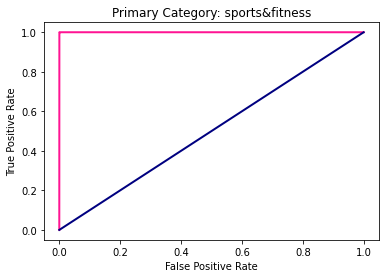

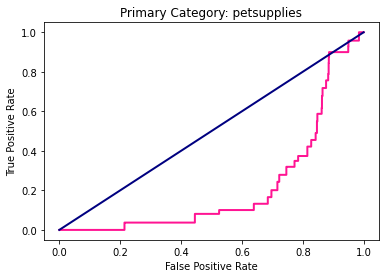

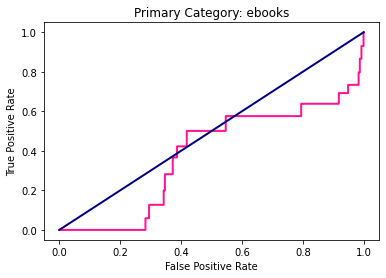

In [34]:
plot_roc_curve(y_test, lr_pred_prob)

In [35]:
#Average Area Under the Curve

auc = roc_auc_score(y_test, lr_pred_prob, multi_class='ovr')
print('Average AUC score for all the categories is {}'.format(auc))

Average AUC score for all the categories is 0.5777377428479334


In [36]:
#3) Evaluation using the Multinomial Naive Bayes Classifier

print("********** NAIVE BAYES CLASSIFIER **********")
y_test, nb_predict, nb_pred_prob = naive_bayes(x,y)

********** NAIVE BAYES CLASSIFIER **********
Validation Accuracy:  0.9585897435897436


*********** CONFUSION MATRIX **************
[[596   0   0   0  10   0   0   0   2   0   3   0   0]
 [  1 557  15   0   0   0   9   0   0   7   4   0   8]
 [  0  45 564   0   0   1   2   1   0   0   0   1   0]
 [  0   0   0 575   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0 617  11   0   0   3   0   3   0   1]
 [  0   0   2   0   0 600   0   0   0   0   0   0   0]
 [  8  43   0   0  10   0 505   1   2  11   8  10   6]
 [  0   0   3   0   0   0   0 631   1   0   0   0   0]
 [  0   4   1   0   3   0   1   2 576   1  16   0   4]
 [  0   0   0   0   0   0   0   0   0 567   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 558   0   0]
 [  0   0   0   0   6   0   2   0   0   6   1 552   0]
 [  2   0   0   0   9   0   4   0   4   4  18   2 579]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.98   

In [37]:
#4) Evaluation using Linear Support Vector Machine

print("********* LINEAR SVM *********")
y_test, svm_predict = linear_svm(x,y)

********* LINEAR SVM *********
Validation Accuracy:  0.9934615384615385


*********** CONFUSION MATRIX **************
[[611   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 601   0   0   0   0   0   0   0   0   0   0   0]
 [  0   6 607   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0 575   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0 633   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 602   0   0   0   0   0   0   0]
 [  0  10   3   0   4   0 580   0   0   0   2   4   1]
 [  0   1   0   0   0   0   0 634   0   0   0   0   0]
 [  1   2   0   0   2   1   0   0 594   0   6   0   2]
 [  0   0   0   0   0   0   0   0   0 567   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 558   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 567   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0 620]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.99      1.00      1

In [38]:
#5) Evaluation using Decision Trees Classifier

print("********** DECISION TREES CLASSIFIER *************")
y_test, dtree_predict, dtree_pred_prob = decision_trees(x,y)

********** DECISION TREES CLASSIFIER *************
Validation Accuracy:  0.7332051282051282


*********** CONFUSION MATRIX **************
[[573   0   0   2  17   3  12   0   0   0   1   0   3]
 [  0 394  14   7   0   0 157   0  24   2   0   0   3]
 [  0   9 477   7   0   1  49   5  62   0   0   0   4]
 [  0   0   0 538   0   0   0   0  37   0   0   0   0]
 [ 11   0   4  25 416   0 166   5   7   2   0   0   0]
 [  0   0   2   0 194 357  18   4  27   0   0   0   0]
 [  0  12   3  36   3   0 504   5  17   3   0  11  10]
 [  0  18  10   0  95   1 176 316  12   0   0   0   7]
 [  2   1   7  25  59   0  72   5 434   0   0   1   2]
 [  0   0   0  44   0   0  19   0   0 480   0   0  24]
 [  0   0   0   3   2  64 127  10  18   0 329   0   5]
 [  0   0   0   1   0   0  60   0   1   0   0 493  12]
 [  0   0   0  41  42   1 101   8   9  12   0   0 408]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0

In [39]:
#6) Evaluation using the Random Forest Classifier

print("********** RANDOM FOREST CLASSIFIER *************")
y_test, rfc_predict, rfc_pred_prob = random_forest(x,y)

********** RANDOM FOREST CLASSIFIER *************
Validation Accuracy:  0.9375641025641026


*********** CONFUSION MATRIX **************
[[599   0   0   0  10   0   0   0   0   0   1   1   0]
 [  0 482  17   0   0   0  82   0   0   0   4  16   0]
 [  0  11 591   0   0   4   4   1   0   0   0   3   0]
 [  0   0   0 575   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0 585  33  10   0   0   0   2   2   2]
 [  0   0   0   0   0 601   1   0   0   0   0   0   0]
 [  4   4   2   0   6   0 525   4   1   2   7  49   0]
 [  0   0   0   0   0  51   0 576   8   0   0   0   0]
 [  1   2   1   0   2  30   5   0 544   0   9  10   4]
 [  0   0   0   0   0   0   0   0   0 546   0  21   0]
 [  0   0   0   0   0   0   6   0   0   0 548   4   0]
 [  5   0   0   0   0   0   5   0   0   3   5 544   5]
 [  0   0   0   0   0   2   5   0   1   0   5  12 597]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.

In [40]:
#7) Evaluation using the K Nearest Neighbours Model

print("********** K NEAREST NEIGHBOURS *************")
y_test, knn_predict, knn_pred_prob = k_nearest_neighbours(x,y)

********** K NEAREST NEIGHBOURS *************
Validation Accuracy:  0.9758974358974359


*********** CONFUSION MATRIX **************
[[605   0   0   0   1   0   0   3   0   0   0   1   1]
 [  0 590   0   0   0   0   6   0   0   3   2   0   0]
 [  0  15 593   0   0   2   0   1   2   0   1   0   0]
 [  0   0   0 575   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0 600  23   0   0   3   0   0   0   3]
 [  0   0   1   0   1 598   0   2   0   0   0   0   0]
 [  3  11   2   0   3   5 547   6   3   0   4   8  12]
 [  0   0   3   0   0   1   0 629   2   0   0   0   0]
 [  0   2   0   0   1  24   0   0 571   0   6   0   4]
 [  0   0   0   0   0   0   0   0   0 567   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 558   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0 565   0]
 [  0   0   0   0   0   2   2   0   0   0   3   1 614]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.98  

In [41]:
#Reading the Balanced Dataset created using the Undersampling & Resampling Technique

undersampled_df = pd.read_csv("/content/drive/MyDrive/Flipkart_undersampling_balanced_products.csv")
undersampled_df

,Unnamed: 0,Product name in Flipkart,product_category_tree,Retail Price in Flipkart,Discounted Price in Flipkart,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
0,0,Northern Lights Striped Men's Round Neck T-Shirt,"[""Clothing >> Men's Clothing >> T-Shirts >> No...",999.0,599.0,Northern Lights Striped Men's Round Neck T-Shi...,NaN,clothing,1,-0.007143,232,northern light striped men round neck tshirt b...
1,1,ShowTime Women's T-Shirt Bra,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",599.0,140.0,ShowTime Women's T-Shirt Bra - Buy Black ShowT...,Black,clothing,1,0.058333,185,showtime woman tshirt bra buy black showtime w...
2,2,Cotton Fab Printed Women's Maternity Wear Kurti,"[""Clothing >> Women's Clothing >> Maternity We...",3900.0,780.0,Key Features of Cotton Fab Printed Women's Mat...,Cotton Fab,clothing,1,0.316667,319,key feature cotton fab printed woman maternity...
3,3,Inmark Men's Checkered Formal Shirt,"[""Clothing >> Men's Clothing >> Shirts >> Form...",1099.0,660.0,Inmark Men's Checkered Formal Shirt\n ...,Regular,clothing,1,0.167262,861,inmark men checkered formal shirt price put co...
4,4,killys Men's Solid No Show Socks,"[""Clothing >> Men's Clothing >> Accessories & ...",1099.0,296.0,Key Features of killys Men's Solid No Show Soc...,killys,clothing,1,0.158333,280,key feature killys men solid show sock cotton ...
...,...,...,...,...,...,...,...,...,...,...,...,...
12155,12155,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",3559.0,1369.0,Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra,babycare,1,0.371429,210,buy wallmantra large vinyl sticker sticker onl...
12156,12156,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",3016.0,2194.0,Buy Wallmantra Extra Large Vinyl Stickers Stic...,Wallmantra,babycare,1,0.278571,222,buy wallmantra extra large vinyl sticker stick...
12157,12157,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",7069.0,2719.0,Buy Wallmantra Extra Large Vinyl Stickers Stic...,Wallmantra,babycare,1,0.278571,222,buy wallmantra extra large vinyl sticker stick...
12158,12158,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",5795.0,2229.0,Buy Wallmantra Extra Large Vinyl Stickers Stic...,Wallmantra,babycare,1,0.278571,222,buy wallmantra extra large vinyl sticker stick...


In [42]:
#Evaluation of the ML Model on Balanced (Undersampling) testing dataset

x = undersampled_df['cleaned_desc']
y = undersampled_df['primary_categories']

In [43]:
#1) Evaluation using the Logistic Regression Model

print("********** LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression(x,y)

********** LOGISTIC REGRESSION **********
Validation Accuracy:  0.9486019736842105


*********** CONFUSION MATRIX **************
[[203   0   0   0   2   0   1   0   0   0   1   0   0]
 [  0  57   1   0   0   2   4   0   2   0   1   0   1]
 [  0   3 346   0   0   0   3   0   1   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   1   0   0]
 [  3   0   0   0 218   0   0   0   0   0   1   0   1]
 [  0   0   1   0   1 224   0   0   0   0   0   0   0]
 [  1  10   0   0  11   3 457   0   5   0   1   3   5]
 [  0   0   0   0   2   0   1 333   1   0   0   0   0]
 [  0   0   3   0   1   1   4   2 295   0   5   0   1]
 [  0   0   0   0   0   0   0   0   0   3   0   0   3]
 [  0   0   1   0   0   1   1   0   4   0  23   0   0]
 [  3   0   0   0   0   0   4   0   0   0   1  66   1]
 [  2   0   0   0   2   2   4   0   3   0   2   0  82]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.96      

In [44]:
#2) Evaluation using the Multiclass Variant of Logistic Regression Model

print("********** LOGISTIC REGRESSION MULTICLASS **********")
y_test, lr_predict, lr_pred_prob = logistic_regression_multiclass(x,y)

********** LOGISTIC REGRESSION MULTICLASS **********
Validation Accuracy:  0.9654605263157895


*********** CONFUSION MATRIX **************
[[205   0   0   0   0   0   1   0   0   0   1   0   0]
 [  0  59   1   0   0   0   4   0   2   0   0   0   2]
 [  0   4 347   0   0   0   2   0   0   0   0   0   0]
 [  0   0   0   1   0   0   1   0   0   0   0   0   0]
 [  2   0   0   0 220   0   0   0   0   0   1   0   0]
 [  0   0   1   0   1 224   0   0   0   0   0   0   0]
 [  1  10   1   0   6   0 468   0   3   0   1   2   4]
 [  0   0   0   0   2   0   1 333   1   0   0   0   0]
 [  0   0   1   0   1   0   3   1 300   0   4   0   2]
 [  0   0   0   0   0   0   0   0   0   6   0   0   0]
 [  0   0   1   0   0   0   0   0   2   0  27   0   0]
 [  0   0   0   0   0   0   3   0   0   0   1  71   0]
 [  0   0   0   0   4   0   3   0   1   0   2   0  87]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive      

In [45]:
#Plotting the ROC Curves for each of the 13 categories and calculating the AUC score for them
print("TESTING LABELS: {}".format(y_test.shape))
print("PREDICTED LABELS: {}".format(lr_predict.shape))
print("PROBABILITY OF THE PREDICTED LABELS: {}".format(lr_pred_prob.shape))

TESTING LABELS: (2432,)
PREDICTED LABELS: (2432,)
PROBABILITY OF THE PREDICTED LABELS: (2432, 13)


In [46]:
#converting the Test Classes (y_test) from Pandas Series object to Numpy array
y_test = y_test.to_numpy()
length = y_test.shape

#conerting the string classes into the respective numbers based on their mapping as described previously
for i in range(length[0]):
  y_test[i] = reverse_category_mapping[y_test[i]]
  lr_predict[i] = reverse_category_mapping[lr_predict[i]]

print("The last 10 actual labels: {}".format(y_test[:10]))
print("The last 10 predicted labels: {}".format(lr_predict[:10]))

The last 10 actual labels: [3 6 0 8 0 3 0 0 5 2]
The last 10 predicted labels: [3 10 0 8 0 3 0 0 5 2]


In [47]:
#converting the actual test labels into a binary 2d numpy array according to their classes

n_classes = 13
temp_array = [[0 for i in range(n_classes)] for i in range(length[0])]

j=0
for i in y_test:
  temp_array[j][i] = 1
  j+=1

#converting the temporary array into a numpy array 
y_test = np.array(temp_array)
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


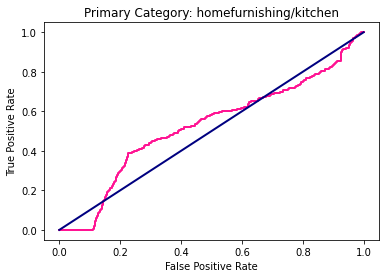

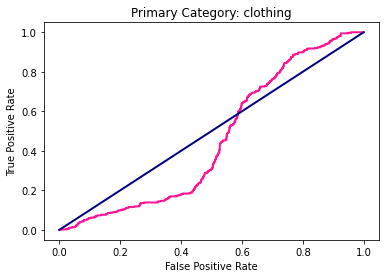

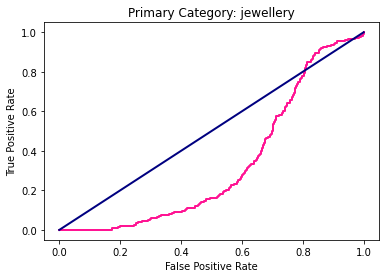

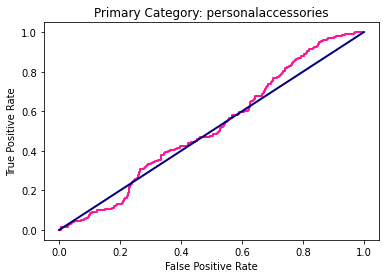

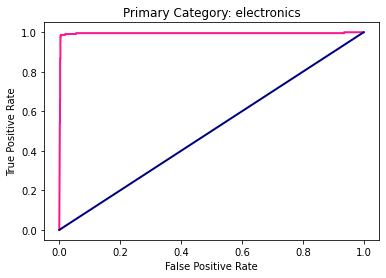

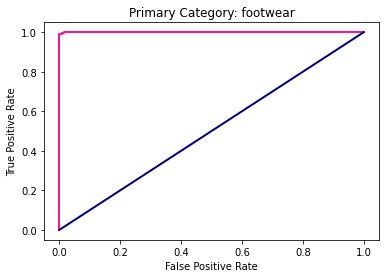

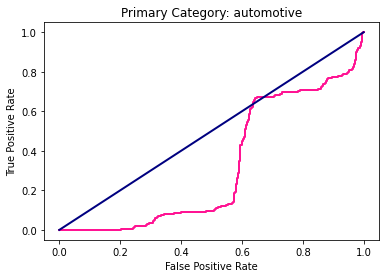

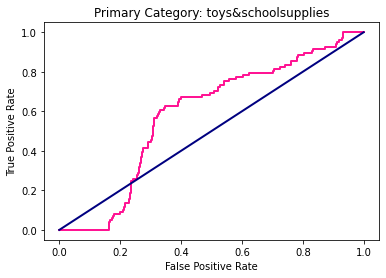

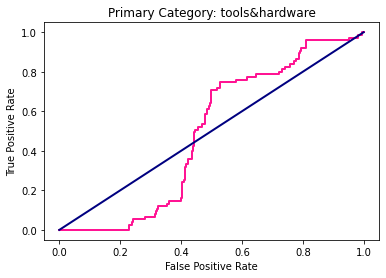

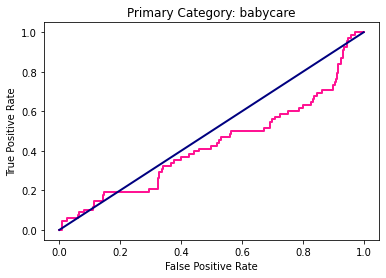

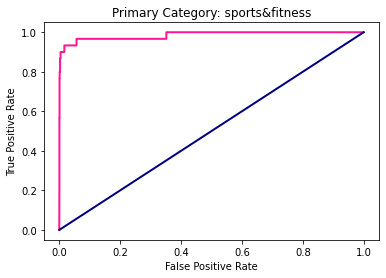

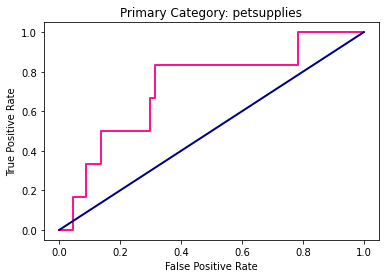

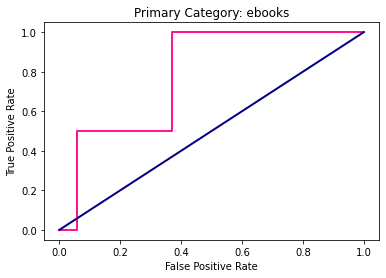

In [48]:
plot_roc_curve(y_test, lr_pred_prob)

In [49]:
#Average Area Under the Curve

auc = roc_auc_score(y_test, lr_pred_prob, multi_class='ovr')
print('Average AUC score for all the categories is {}'.format(auc))

Average AUC score for all the categories is 0.625892548715162


In [50]:
#3) Evaluation using the Multinomial Naive Bayes Classifier

print("********** NAIVE BAYES CLASSIFIER **********")
y_test, nb_predict, nb_pred_prob = naive_bayes(x,y)

********** NAIVE BAYES CLASSIFIER **********
Validation Accuracy:  0.9054276315789473


*********** CONFUSION MATRIX **************
[[195   0   0   0   3   0   6   0   3   0   0   0   0]
 [  0   0  35   0   0   0  30   0   3   0   0   0   0]
 [  0   0 349   0   0   0   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   1   0   0   0   0]
 [  1   0   0   0 200   0   6   0  16   0   0   0   0]
 [  0   0   1   0   0 222   1   1   1   0   0   0   0]
 [  1   1   0   0   7   0 484   1   2   0   0   0   0]
 [  0   0   1   0   0   0   3 333   0   0   0   0   0]
 [  0   0   2   0   2   0  15   2 291   0   0   0   0]
 [  1   0   0   0   0   0   5   0   0   0   0   0   0]
 [  1   0   2   0   1   1   9   0  16   0   0   0   0]
 [  2   0   0   0   1   0  12   0   1   0   0  59   0]
 [  0   0   0   0   3   0  17   0   8   0   0   0  69]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.97   

In [51]:
#4) Evaluation using Linear Support Vector Machine

print("********* LINEAR SVM *********")
y_test, svm_predict = linear_svm(x,y)

********* LINEAR SVM *********
Validation Accuracy:  0.9749177631578947


*********** CONFUSION MATRIX **************
[[206   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0  59   1   0   0   0   5   0   2   0   0   0   1]
 [  0   2 349   0   0   1   1   0   0   0   0   0   0]
 [  0   0   0   1   0   0   1   0   0   0   0   0   0]
 [  2   0   0   0 221   0   0   0   0   0   0   0   0]
 [  0   0   1   0   1 224   0   0   0   0   0   0   0]
 [  0   5   1   0   5   0 479   0   2   0   1   1   2]
 [  0   0   0   0   0   0   1 335   1   0   0   0   0]
 [  0   0   1   0   1   0   4   0 303   0   2   0   1]
 [  0   0   0   0   0   0   0   0   0   5   0   0   1]
 [  0   0   1   0   0   0   0   0   2   0  27   0   0]
 [  0   0   0   0   0   0   3   0   0   0   0  71   1]
 [  0   0   0   0   1   0   3   0   1   0   1   0  91]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.99      1.00      0

In [52]:
#5) Evaluation using Decision Trees Classifier

print("********** DECISION TREES CLASSIFIER *************")
y_test, dtree_predict, dtree_pred_prob = decision_trees(x,y)

********** DECISION TREES CLASSIFIER *************
Validation Accuracy:  0.7438322368421053


*********** CONFUSION MATRIX **************
[[169   0   0   0   1   0   2   0   5   0  28   0   2]
 [ 13  36   6   0   1   1   9   0   2   0   0   0   0]
 [  3   3 285   0   1  38   8   0  15   0   0   0   0]
 [  1   0   0   0   0   0   1   0   0   0   0   0   0]
 [ 14   2   0   0 155   0  29   2   4   0   6   0  11]
 [  0   0   6   0  84 133   2   0   1   0   0   0   0]
 [ 85   6   1   0   2   0 377   6   9   0   1   2   7]
 [  0   0   2   0  49   0   5 275   3   0   2   0   1]
 [  8   0   5   0  23   1  28   0 235   0   8   0   4]
 [  2   0   0   0   0   0   4   0   0   0   0   0   0]
 [  1   0   1   0   0   1  10   0   3   0  13   0   1]
 [  5   0   0   0   0   0   7   0   1   0   0  62   0]
 [  5   0   0   0   8   0  12   1   2   0   0   0  69]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0

In [53]:
#6) Evaluation using the Random Forest Classifier

print("********** RANDOM FOREST CLASSIFIER *************")
y_test, rfc_predict, rfc_pred_prob = random_forest(x,y)

********** RANDOM FOREST CLASSIFIER *************
Validation Accuracy:  0.9235197368421053


*********** CONFUSION MATRIX **************
[[201   0   0   0   0   0   4   0   2   0   0   0   0]
 [  0  29   9   0   0   0  27   0   3   0   0   0   0]
 [  0   0 346   0   0   0   6   0   1   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0   0   0   0   0]
 [  1   0   0   0 204   0  15   0   3   0   0   0   0]
 [  0   0   5   0   5 212   4   0   0   0   0   0   0]
 [  0   0   0   0   6   0 489   1   0   0   0   0   0]
 [  0   0   0   0   8   0   2 326   1   0   0   0   0]
 [  0   0   3   0   4   0  21   0 284   0   0   0   0]
 [  0   0   0   0   0   0   5   0   0   1   0   0   0]
 [  0   0   1   0   0   1  12   0   1   0  15   0   0]
 [  0   0   0   0   0   0   9   0   1   0   0  65   0]
 [  0   0   0   0   5   0  14   0   4   0   0   0  74]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       1.

In [54]:
#7) Evaluation using the K Nearest Neighbours Model

print("********** K NEAREST NEIGHBOURS *************")
y_test, knn_predict, knn_pred_prob = k_nearest_neighbours(x,y)

********** K NEAREST NEIGHBOURS *************
Validation Accuracy:  0.9453125


*********** CONFUSION MATRIX **************
[[204   0   0   0   0   0   2   0   1   0   0   0   0]
 [  0  57   3   0   1   1   3   0   1   0   0   1   1]
 [  0  10 342   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   1   0   0   0   1   0   0   0   0   0]
 [  5   0   0   0 205  12   0   0   0   0   0   0   1]
 [  0   0   0   0   0 222   0   2   2   0   0   0   0]
 [  1   3   0   0   6   3 463   8   2   0   2   5   3]
 [  0   0   1   0   0   0   1 334   1   0   0   0   0]
 [  0   0   0   0   0  11   2   2 291   0   4   0   2]
 [  0   0   0   0   0   0   1   0   0   4   0   0   1]
 [  1   0   1   0   0   1   0   0   5   0  22   0   0]
 [  1   0   0   0   1   0   4   0   0   0   0  68   1]
 [  1   0   0   0   2   1   2   1   4   0   0   0  86]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.96      0.99 

Conclusion from Flipkart Dataset:

Under Unbalanced data,Linear Support vector machine model has the highest accuracy with 97.9%

Under Oversampled data,Linear Support vector machine model has the highest accuracy with 99.3%

Under Undersampled data,Linear Support vector machine model has the highest accuracy with 97.4%

So,Finally we can select the Oversampled Flipkart Dataset.

In [55]:
#For Amazon Dataset
#Reading the Imbalanced Dataset

unbalanced_df_1 = pd.read_csv('/content/drive/MyDrive/Amazon_unbalanced_products.csv')
unbalanced_df_1.head(15)

,Unnamed: 0,Product name in Amazon,product_category_tree,Retail Price in Amazon,Discounted Price in Amazon,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
0,0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",982,438,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.143750,410,key feature alisha solid woman cycling short c...
1,1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32143,29121,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen,1,0.113814,4445,fabhomedecor fabric double sofa bed finish col...
2,2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",991,551,Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear,1,0.027778,650,key feature belly sandal wedge heel casualsaw ...
3,3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",694,325,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.122917,403,key feature alisha solid woman cycling short c...
4,4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",208,258,Specifications of Sicons All Purpose Arnica Do...,Sicons,petsupplies,1,0.050000,248,specification sicons purpose arnica dog shampo...
5,5,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",427,473,Key Features of Eternal Gandhi Super Series Cr...,Eternal Gandhi,noise,0,0.322727,882,key feature eternal gandhi super series crysta...
6,6,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",1198,602,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.127778,416,key feature alisha solid woman cycling short c...
7,7,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32137,28664,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen,1,0.135063,4397,fabhomedecor fabric double sofa bed finish col...
8,8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",682,385,"Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,footwear,1,-0.032143,428,key feature dilli bazaaar belly corporate casu...
9,9,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",1197,542,Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.098333,419,key feature alisha solid woman cycling short c...


In [56]:
#helper dictionaries created which are later used to manipulate the testing output into suitable form before plotting the ROC Curves

category_mapping = {  0	: "homefurnishing/kitchen",
                      1	: "clothing",
                      2	: "jewellery",
                      3	: "personalaccessories",	
                      4	: "electronics",	
                      5	: "footwear",	
                      6	: "automotive",	
                      7	: "toys&schoolsupplies",
                      8	: "tools&hardware",	
                      9	: "babycare",	
                      10 : "sports&fitness",	
                      11 : "petsupplies",	
                      12 : "ebooks"	}

reverse_category_mapping = {"homefurnishing/kitchen":0,
                            "clothing":1,
                            "jewellery":2,
                            "personalaccessories":3,	
                            "electronics":4,	
                            "footwear":5,	
                            "automotive":6,	
                            "toys&schoolsupplies":7,
                            "tools&hardware":8,	
                            "babycare":9,	
                            "sports&fitness":10,	
                            "petsupplies":11,	
                            "ebooks":12}

In [57]:
#dropping the noise in the dataset by considering only the above mentioned categories

print(unbalanced_df_1.shape)
unbalanced_df_1 = unbalanced_df_1[unbalanced_df_1["main_category"]==1]
print(unbalanced_df_1.shape)

(17540, 12)
(17210, 12)


In [58]:
#Evaluation of the ML Model on unbalanced testing dataset
# the cleaned product description corresponds to the x value 
x = unbalanced_df_1['cleaned_desc']
# the 13 labels/ product categories mentioned above correspond to the y value
y = unbalanced_df_1['primary_categories']

In [59]:
#1) Evaluation using the Logistic Regression Model

print("********** LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression(x,y)

********** LOGISTIC REGRESSION **********
Validation Accuracy:  0.9668797210923882


*********** CONFUSION MATRIX **************
[[ 221    0    0    0    3    0    0    0    1    0    1    0    0]
 [   0   53    4    0    0    0    8    0    2    0    1    0    1]
 [   0    3 1070    0    0    0    4    1    0    0    0    0    0]
 [   0    0    1    0    1    0    0    0    0    0    1    0    0]
 [   1    0    0    0  255    0    0    0    1    0    0    0    0]
 [   0    0    2    0    0  211    0    0    0    0    0    0    0]
 [   1    6    0    0    9    2  415    3    5    0    0    3    5]
 [   0    0    0    0    1    1    0  586    1    0    0    0    0]
 [   0    0    0    0    1    2    4    3  308    0    3    0    1]
 [   0    0    0    0    0    0    0    0    0    7    0    0    0]
 [   0    0    0    0    0    1    0    0    5    0   29    0    0]
 [   5    0    0    0    1    0    0    0    2    0    0   65    1]
 [   2    0    0    0    1    2    3    0    4    0    

In [60]:
#2) Evaluation using the Multiclass Variant of Logistic Regression

print("********** MULTICLASS LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression_multiclass(x,y)

********** MULTICLASS LOGISTIC REGRESSION **********
Validation Accuracy:  0.9732713538640325


*********** CONFUSION MATRIX **************
[[ 223    0    0    0    2    0    0    0    0    0    1    0    0]
 [   0   54    2    0    0    0    7    0    2    0    1    0    3]
 [   0    7 1069    0    0    0    1    1    0    0    0    0    0]
 [   0    0    1    0    1    0    0    0    0    0    1    0    0]
 [   1    0    0    0  255    0    0    0    1    0    0    0    0]
 [   0    0    1    0    0  212    0    0    0    0    0    0    0]
 [   1    5    0    0    8    1  421    3    3    0    0    2    5]
 [   0    0    0    0    2    0    0  586    1    0    0    0    0]
 [   2    0    0    0    1    2    2    3  308    0    3    0    1]
 [   0    0    0    0    0    0    0    0    0    7    0    0    0]
 [   0    0    0    0    0    0    0    0    3    0   32    0    0]
 [   2    0    0    0    0    0    0    0    1    0    0   71    0]
 [   2    0    0    0    0    0    3    0   

In [61]:
#Plotting the ROC Curves for each of the 13 categories and calculating the AUC score for them
print("TESTING LABELS: {}".format(y_test.shape))
print("PREDICTED LABELS: {}".format(lr_predict.shape))
print("PROBABILITY OF THE PREDICTED LABELS: {}".format(lr_pred_prob.shape))

TESTING LABELS: (3442,)
PREDICTED LABELS: (3442,)
PROBABILITY OF THE PREDICTED LABELS: (3442, 13)


In [62]:
#converting the Test Classes (y_test) from Pandas Series object to Numpy array
y_test = y_test.to_numpy()
length = y_test.shape

#conerting the string classes into the respective numbers based on their mapping as described previously
for i in range(length[0]):
  y_test[i] = reverse_category_mapping[y_test[i]]
  lr_predict[i] = reverse_category_mapping[lr_predict[i]]

print("The last 10 actual labels: {}".format(y_test[:10]))
print("The last 10 predicted labels: {}".format(lr_predict[:10]))

The last 10 actual labels: [1 1 2 4 1 2 3 4 7 2]
The last 10 predicted labels: [1 1 2 4 1 2 3 4 7 2]


In [63]:
#converting the actual test labels into a binary 2d numpy array according to their classes

n_classes = 13
temp_array = [[0 for i in range(n_classes)] for i in range(length[0])]

j=0
for i in y_test:
  temp_array[j][i] = 1
  j+=1

#converting the temporary array into a numpy array 
y_test = np.array(temp_array)
print(y_test)

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


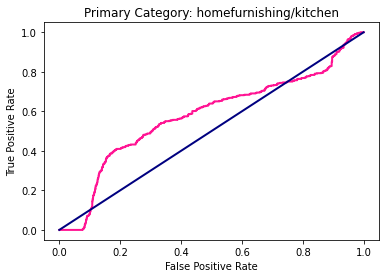

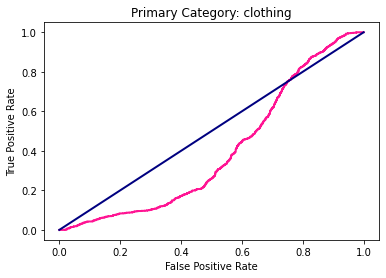

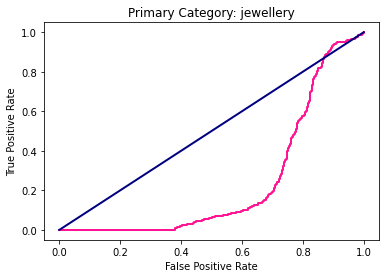

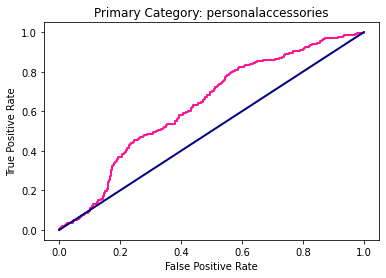

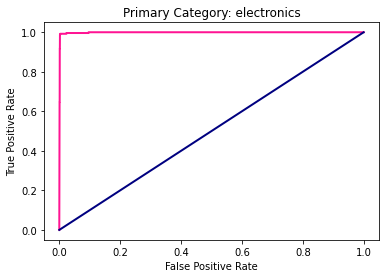

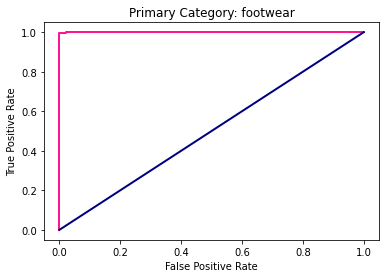

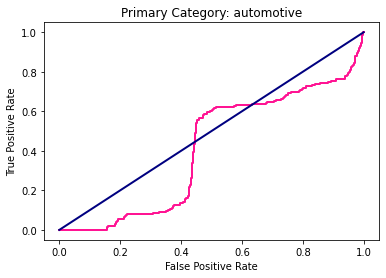

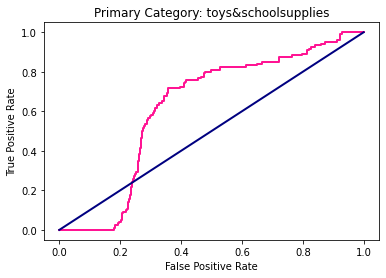

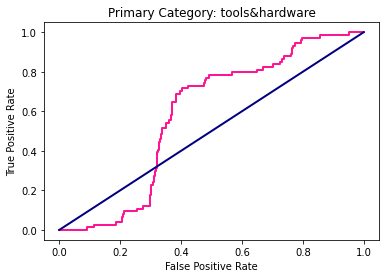

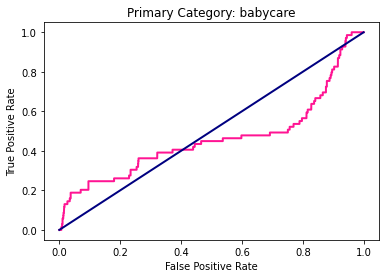

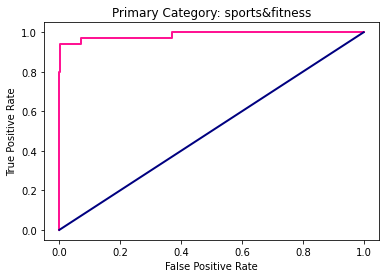

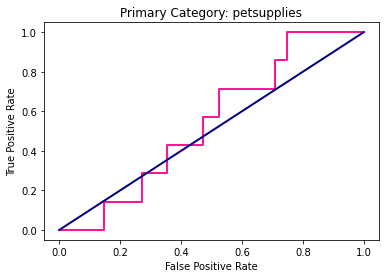

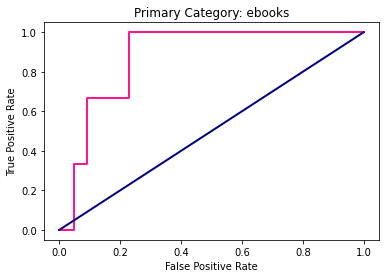

In [64]:
plot_roc_curve(y_test, lr_pred_prob)

In [65]:
#Average Area Under the Curve

auc = roc_auc_score(y_test, lr_pred_prob, multi_class='ovr')
print('Average AUC score for all the categories is {}'.format(auc))

Average AUC score for all the categories is 0.6399788322842173


In [66]:
#3) Multinomial Naive Bayes Classifier

print("********* NAIVE BAYES CLASSIFIER *********")
y_test, nb_predict, nb_pred_prob = naive_bayes(x,y)

********* NAIVE BAYES CLASSIFIER *********
Validation Accuracy:  0.910226612434631


*********** CONFUSION MATRIX **************
[[ 209    0    2    0    5    0    6    0    4    0    0    0    0]
 [   1    0   41    0    0    0   25    2    0    0    0    0    0]
 [   0    0 1077    0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    1    0    2    0    0    0    0    0    0]
 [   0    0    1    0  233    0    0   22    1    0    0    0    0]
 [   0    0   10    0    0  200    0    3    0    0    0    0    0]
 [   0    0    6    0    8    0  427    6    2    0    0    0    0]
 [   0    0    5    0    0    0    0  583    1    0    0    0    0]
 [   0    0   13    0    1    0   11    7  290    0    0    0    0]
 [   1    0    0    0    0    0    6    0    0    0    0    0    0]
 [   1    0    9    0    1    1   11    1   11    0    0    0    0]
 [   3    0    0    0    2    0   12    1    1    0    0   55    0]
 [   2    0    1    0    1    0   23   27    7    0    

In [67]:
#4)Linear Support Vector Machine
print("********* LINEAR SVM *********")
y_test, svm_predict = linear_svm(x,y)

********* LINEAR SVM *********
Validation Accuracy:  0.9787914003486345


*********** CONFUSION MATRIX **************
[[ 226    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   54    2    0    0    0    8    0    2    0    1    0    2]
 [   0    3 1074    0    0    0    0    1    0    0    0    0    0]
 [   0    0    1    1    1    0    0    0    0    0    0    0    0]
 [   2    0    0    0  254    0    0    0    1    0    0    0    0]
 [   0    0    1    0    1  211    0    0    0    0    0    0    0]
 [   1    4    0    0    5    0  429    2    4    0    0    1    3]
 [   0    0    0    0    1    0    0  588    0    0    0    0    0]
 [   0    1    0    0    1    0    3    3  310    0    2    0    2]
 [   0    0    0    0    0    0    0    0    0    7    0    0    0]
 [   0    0    0    0    0    0    0    0    3    0   32    0    0]
 [   0    0    0    0    0    0    1    0    1    0    0   72    0]
 [   2    0    0    0    0    0    4    0    3    0    0    0  111

In [68]:
#5) Decision Trees Classifier

print("********** DECISION TREES CLASSIFIER *************")
y_test, dtree_predict, dtree_pred_prob = decision_trees(x,y)

********** DECISION TREES CLASSIFIER *************
Validation Accuracy:  0.658047646717025


*********** CONFUSION MATRIX **************
[[207   0   1   0   6   0   9   1   0   0   1   0   1]
 [ 11  18  23   0   0   0   9   2   1   0   5   0   0]
 [ 11  12 849   0   0   1  10  64  13   0   1   0 117]
 [  0   0   0   0   1   0   2   0   0   0   0   0   0]
 [ 16   0   4   0 113   0  24   0  88   0   6   1   5]
 [  0   0   9   0   0 132   2   0  69   0   1   0   0]
 [ 89  45   4   0   3   0 212   2  41   0  42   6   5]
 [  1   0   2   0   0   6  12 352 206   0   1   4   5]
 [ 24   1  10   0   0  17  20   1 235   0  12   0   2]
 [  1   0   1   0   0   0   1   0   1   0   3   0   0]
 [  0   1   3   0   1   3   6   0   9   0  11   0   1]
 [  5   0   0   0   0   0   3   0   0   0   2  63   1]
 [ 16   0   0   0   1   0  13   0   5   0  12   0  73]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.

In [69]:
#6) Random Forest Classifier

print("********** RANDOM FOREST CLASSIFIER *************")
y_test, rfc_predict, rfc_pred_prob = random_forest(x,y)

********** RANDOM FOREST CLASSIFIER *************
Validation Accuracy:  0.9227193492155723


*********** CONFUSION MATRIX **************
[[ 209    0    1    0    6    0   10    0    0    0    0    0    0]
 [   0   14   28    0    0    0   25    2    0    0    0    0    0]
 [   0    0 1077    0    0    0    1    0    0    0    0    0    0]
 [   0    0    3    0    0    0    0    0    0    0    0    0    0]
 [   0    0    5    0  234    0    6    0   12    0    0    0    0]
 [   0    0   23    0    0  186    0    0    4    0    0    0    0]
 [   0    0    5    0    6    0  430    6    2    0    0    0    0]
 [   0    0    2    0    0    0    0  586    1    0    0    0    0]
 [   0    0   10    0    0    2   19    2  289    0    0    0    0]
 [   0    0    0    0    0    0    4    0    0    3    0    0    0]
 [   0    0    7    0    0    0    9    1    7    0   11    0    0]
 [   0    0    0    0    0    0   11    0    1    0    0   62    0]
 [   3    0    0    0    0    0   31    4    7 

In [70]:
#7) K Nearest Neighbours

print("********** K NEAREST NEIGHBOURS *************")
y_test, knn_predict, knn_pred_prob = k_nearest_neighbours(x,y)

********** K NEAREST NEIGHBOURS *************
Validation Accuracy:  0.9567112144102267


*********** CONFUSION MATRIX **************
[[ 223    0    1    0    0    0    0    0    1    0    1    0    0]
 [   0   46    9    0    1    0   10    0    0    0    1    0    2]
 [   0    4 1071    0    0    0    1    1    1    0    0    0    0]
 [   0    0    1    0    1    0    0    1    0    0    0    0    0]
 [   0    0    1    0  240   14    0    0    1    0    0    0    1]
 [   0    0    1    0    0  210    0    2    0    0    0    0    0]
 [   4    4    1    0    8    3  413   11    4    0    0    0    1]
 [   0    0    0    0    0    0    1  588    0    0    0    0    0]
 [   0    0    4    0    0    8    4    4  299    0    2    0    1]
 [   0    0    0    0    0    0    0    1    0    6    0    0    0]
 [   2    0    1    0    1    2    0    2    6    0   21    0    0]
 [   1    0    0    0    2    0    1    0    1    0    0   69    0]
 [   2    0    0    0    2    2    2    1    4    0

In [71]:
#Reading the Balanced Dataset created using the Oversampling 
oversampled_df_1 = pd.read_csv("/content/drive/MyDrive/Amazon_oversampling_balanced_products.csv")
oversampled_df_1

,Unnamed: 0,Product name in Amazon,product_category_tree,Retail Price in Amazon,Discounted Price in Amazon,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
0,5418,Alex's Barbie Series Barbie Doll Art Plastic P...,"[""Toys & School Supplies >> School Supplies >>...",792,385,Flipkart.com: Buy Alex's Barbie Series Barbie ...,NaN,toys&schoolsupplies,1,0.225000,195,flipkartcom buy ale barbie series barbie doll ...
1,13644,Platignum Carnaby Street Ball Pen,"[""Pens & Stationery >> Pens >> Ball Pens >> Pl...",690,795,Platignum Carnaby Street Ball Pen (Blue)\n ...,Platignum,toys&schoolsupplies,1,0.362835,1420,platignum carnaby street ball pen blue price c...
2,6317,Aardee Varsity Design Art Thick fabric Pencil Box,"[""Toys & School Supplies >> School Supplies >>...",343,349,Aardee Varsity Design Art Thick fabric Pencil ...,NaN,toys&schoolsupplies,1,0.016667,207,aardee varsity design art thick fabric pencil ...
3,5430,Outshiny Eagle Printed Art Polyester Pencil Box,"[""Toys & School Supplies >> School Supplies >>...",187,169,Outshiny Eagle Printed Art Polyester Pencil Bo...,NaN,toys&schoolsupplies,1,0.330000,786,outshiny eagle printed art polyester pencil bo...
4,5207,Starmark BTS Flowers Art Polyester Pencil Box,"[""Toys & School Supplies >> School Supplies >>...",178,116,Flipkart.com: Buy Starmark BTS Flowers Art Pol...,NaN,toys&schoolsupplies,1,0.225000,184,flipkartcom buy starmark bts flower art polyes...
...,...,...,...,...,...,...,...,...,...,...,...,...
38995,2821,Feminine Casual Sleeveless Printed Women's Mul...,"[""Clothing >> Women's Clothing >> Western Wear...",497,365,Key Features of Feminine Casual Sleeveless Pri...,Feminine,clothing,1,0.113636,341,key feature feminine casual sleeveless printed...
38996,10578,Bombay High Women's Solid Formal Shirt,"[""Clothing >> Women's Clothing >> Western Wear...",780,499,Bombay High Women's Solid Formal Shirt - Buy B...,Slim,clothing,1,0.090000,204,bombay high woman solid formal shirt buy blue ...
38997,9875,Hello Dolly Women's Leggings,"[""Clothing >> Women's Clothing >> Western Wear...",1193,439,Hello Dolly Women's Leggings (Pack of 2)\n ...,NaN,clothing,1,0.158333,682,hello dolly woman legging pack price hello dol...
38998,725,For Kids Girl's A-line Dress,"[""Clothing >> Kids' Clothing >> Girls Wear >> ...",5979,3506,For Kids Girl's A-line Dress\n ...,NaN,clothing,1,0.132955,1000,kid girl aline dress price let little princess...


In [72]:
#Evaluation of the ML Model on Balanced (Oversampling) testing dataset

x = oversampled_df_1['cleaned_desc']
y = oversampled_df_1['primary_categories']

In [73]:
#1) Evaluation using the Logistic Regression Model

print("********** LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression(x,y)

********** LOGISTIC REGRESSION **********
Validation Accuracy:  0.9723076923076923


*********** CONFUSION MATRIX **************
[[607   0   0   0   1   0   0   0   0   0   3   0   0]
 [  0 582   8   0   0   0   3   0   2   0   6   0   0]
 [  0  22 579   2   0   1   4   1   1   0   4   0   0]
 [  0   0   0 575   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0 628   0   0   0   1   0   2   0   2]
 [  0   0   0   0   0 601   0   0   0   0   1   0   0]
 [  3  32   2   1   7   0 516   3   4   5   8  13  10]
 [  0   1   1   0   1   1   0 627   0   0   3   1   0]
 [  0   2   1   0   2   1   0   2 583   0  14   0   3]
 [  0   0   0   0   0   0   0   0   0 567   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 558   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0 566   0]
 [  9   0   0   2   0   0   1   0   2   0  13   0 595]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.98      

In [74]:
#2) Evaluation using the Multiclass Variant of Logistic Regression Model

print("********** LOGISTIC REGRESSION MULTICLASS **********")
y_test, lr_predict, lr_pred_prob = logistic_regression_multiclass(x,y)

********** LOGISTIC REGRESSION MULTICLASS **********
Validation Accuracy:  0.985


*********** CONFUSION MATRIX **************
[[608   0   0   0   0   0   0   0   0   0   3   0   0]
 [  0 595   0   0   0   0   0   0   0   0   6   0   0]
 [  0  14 593   2   0   0   3   1   0   0   1   0   0]
 [  0   0   0 575   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0 631   0   0   0   0   0   2   0   1]
 [  0   0   0   0   0 601   0   0   0   0   1   0   0]
 [  1  14   2   0   5   0 553   1   1   2   5  13   7]
 [  0   1   0   0   1   0   0 630   0   0   3   0   0]
 [  1   1   0   0   2   1   0   0 592   0   9   0   2]
 [  0   0   0   0   0   0   0   0   0 567   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 558   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 567   0]
 [  9   0   0   0   0   0   0   0   0   0   0   0 613]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.98      1.

In [75]:
#Plotting the ROC Curves for each of the 13 categories and calculating the AUC score for them
print("TESTING LABELS: {}".format(y_test.shape))
print("PREDICTED LABELS: {}".format(lr_predict.shape))
print("PROBABILITY OF THE PREDICTED LABELS: {}".format(lr_pred_prob.shape))

TESTING LABELS: (7800,)
PREDICTED LABELS: (7800,)
PROBABILITY OF THE PREDICTED LABELS: (7800, 13)


In [76]:
#converting the Test Classes (y_test) from Pandas Series object to Numpy array
y_test = y_test.to_numpy()
length = y_test.shape

#conerting the string classes into the respective numbers based on their mapping as described previously
for i in range(length[0]):
  y_test[i] = reverse_category_mapping[y_test[i]]
  lr_predict[i] = reverse_category_mapping[lr_predict[i]]

print("The last 10 actual labels: {}".format(y_test[:10]))
print("The last 10 predicted labels: {}".format(lr_predict[:10]))

The last 10 actual labels: [10 11 1 5 9 3 2 8 6 0]
The last 10 predicted labels: [10 11 1 5 9 3 2 8 6 0]


In [77]:
#converting the actual test labels into a binary 2d numpy array according to their classes

n_classes = 13
temp_array = [[0 for i in range(n_classes)] for i in range(length[0])]

j=0
for i in y_test:
  temp_array[j][i] = 1
  j+=1

#converting the temporary array into a numpy array 
y_test = np.array(temp_array)
print(y_test)

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


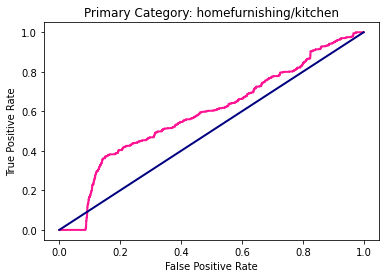

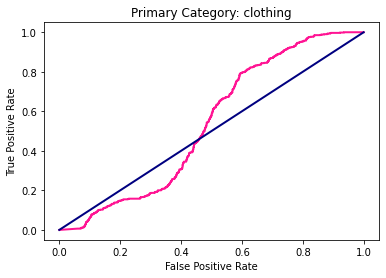

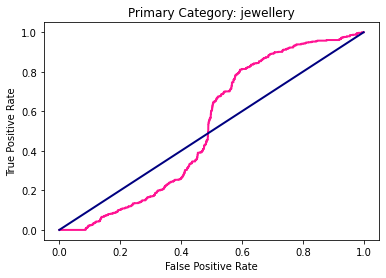

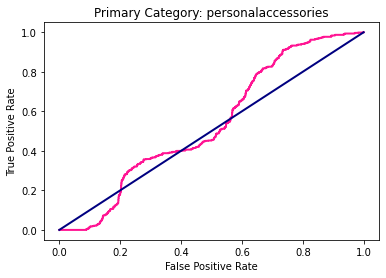

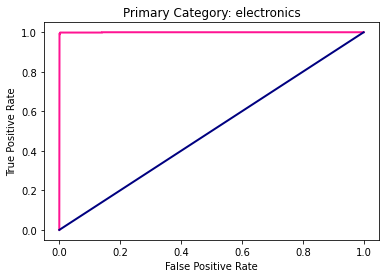

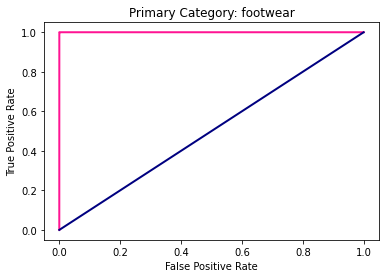

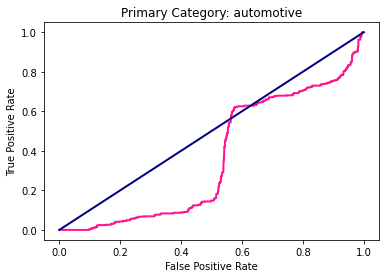

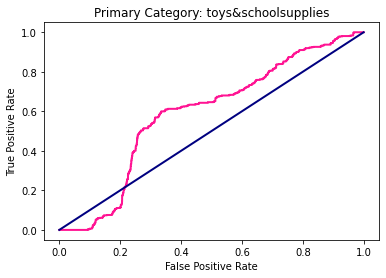

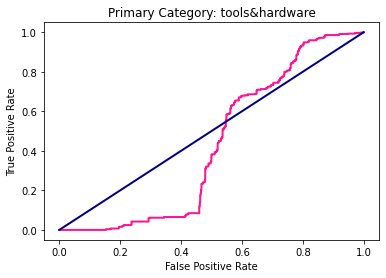

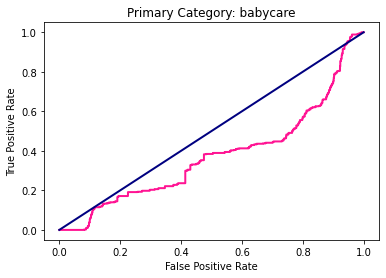

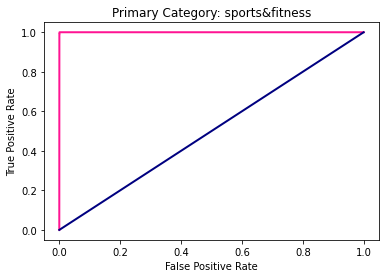

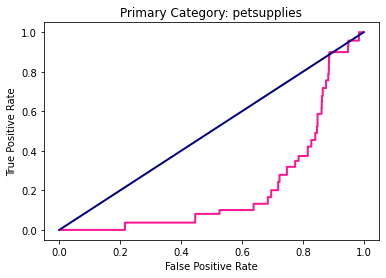

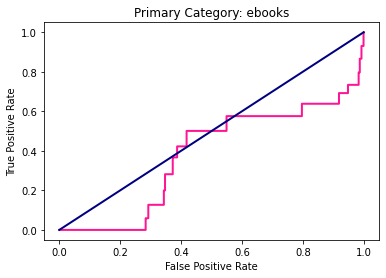

In [78]:
plot_roc_curve(y_test, lr_pred_prob)

In [79]:
#Average Area Under the Curve

auc = roc_auc_score(y_test, lr_pred_prob, multi_class='ovr')
print('Average AUC score for all the categories is {}'.format(auc))

Average AUC score for all the categories is 0.5796118449448117


In [80]:
#3) Evaluation using the Multinomial Naive Bayes Classifier

print("********** NAIVE BAYES CLASSIFIER **********")
y_test, nb_predict, nb_pred_prob = naive_bayes(x,y)

********** NAIVE BAYES CLASSIFIER **********
Validation Accuracy:  0.9555128205128205


*********** CONFUSION MATRIX **************
[[596   0   0   0  10   0   0   0   2   0   3   0   0]
 [  1 552  16   0   0   3   9   0   1   7   4   0   8]
 [  0  60 549   0   0   2   1   1   0   0   0   1   0]
 [  0   0   0 575   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0 616  12   0   0   3   0   3   0   1]
 [  0   0   2   0   0 600   0   0   0   0   0   0   0]
 [  8  46   0   0  10   0 502   1   2  11   8  10   6]
 [  0   0   3   0   0   0   0 631   1   0   0   0   0]
 [  0   4   1   0   3   0   1   2 576   1  16   0   4]
 [  0   0   0   0   0   0   0   0   0 567   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 558   0   0]
 [  0   0   0   0   6   0   2   0   0   6   1 552   0]
 [  2   0   0   0   9   0   4   0   4   4  18   2 579]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.98   

In [81]:
#4) Evaluation using Linear Support Vector Machine

print("********* LINEAR SVM *********")
y_test, svm_predict = linear_svm(x,y)

********* LINEAR SVM *********
Validation Accuracy:  0.992948717948718


*********** CONFUSION MATRIX **************
[[611   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 601   0   0   0   0   0   0   0   0   0   0   0]
 [  1  10 601   0   0   0   0   1   0   0   1   0   0]
 [  0   0   0 575   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0 633   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 602   0   0   0   0   0   0   0]
 [  0  11   2   0   4   0 580   0   0   0   2   4   1]
 [  0   1   0   0   0   0   0 634   0   0   0   0   0]
 [  1   0   0   0   2   0   0   0 596   0   5   1   3]
 [  0   0   0   0   0   0   0   0   0 567   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 558   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 567   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0 620]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.99      1.00      0.

In [82]:
#5) Evaluation using Decision Trees Classifier

print("********** DECISION TREES CLASSIFIER *************")
y_test, dtree_predict, dtree_pred_prob = decision_trees(x,y)

********** DECISION TREES CLASSIFIER *************
Validation Accuracy:  0.7387179487179487


*********** CONFUSION MATRIX **************
[[553   0   0   0  20   0  27   0   0   0   2   0   9]
 [  0 341  30   7   3   0 203   0  11   0   6   0   0]
 [  0   4 533  15   0   3  27   2  28   0   0   0   2]
 [  0   0   0 538   0   0   0   0  37   0   0   0   0]
 [  1   0   1  32 418   0 166   1  10   2   4   1   0]
 [  0   0  30   6 194 338   7   0   2   0  25   0   0]
 [  1  11   5  38   7   0 483   1  25   3   9  12   9]
 [  0  10  13   1  95   1  54 310 131   0   7   0  13]
 [  2   6  18  30  58   1  56   1 408   0  23   1   4]
 [  0   0   0   0   0   0  43   0   0 524   0   0   0]
 [  2   0  73  12   0   0  64   0   0   0 402   0   5]
 [  0   0   0   1   0   0  60   0   0   0   0 492  14]
 [  2   3   0  44  42   0  96   3   3   0   7   0 422]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0

In [83]:
#6) Evaluation using the Random Forest Classifier

print("********** RANDOM FOREST CLASSIFIER *************")
y_test, rfc_predict, rfc_pred_prob = random_forest(x,y)

********** RANDOM FOREST CLASSIFIER *************
Validation Accuracy:  0.9267948717948717


*********** CONFUSION MATRIX **************
[[597   0   1   0   7   0   2   0   0   0   3   0   1]
 [  0 464  17   0   0   0  98   0   2   1   1  18   0]
 [  0  10 590   0   0   1   7   1   0   0   0   5   0]
 [  0   0   0 575   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0 548  59  20   0   1   0   4   1   2]
 [  0   0   0   0   0 602   0   0   0   0   0   0   0]
 [  1   0   1   0   5   0 523   2   3   0  12  49   8]
 [  0   0   1   0   0  38   0 586   9   0   0   1   0]
 [  1   0   1   0   0  31   7   0 528   0   9  23   8]
 [  0   0   0   0   0   0   0   0   0 567   0   0   0]
 [  0   0   0   0   0   0   2   0   0   0 552   4   0]
 [  3   0   0   0   0   1  30   0   2   3   0 527   1]
 [  0   0   0   0   0   5  11   2   2   0   4  28 570]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.

In [84]:
#7) Evaluation using the K Nearest Neighbours Model

print("********** K NEAREST NEIGHBOURS *************")
y_test, knn_predict, knn_pred_prob = k_nearest_neighbours(x,y)

********** K NEAREST NEIGHBOURS *************
Validation Accuracy:  0.9738461538461538


*********** CONFUSION MATRIX **************
[[605   0   0   0   1   0   0   3   0   0   0   1   1]
 [  0 590   0   0   0   0   6   0   0   3   2   0   0]
 [  0  32 577   0   0   1   0   1   1   0   2   0   0]
 [  0   0   0 575   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0 600  23   0   0   3   0   0   0   3]
 [  0   0   0   0   1 599   0   2   0   0   0   0   0]
 [  3  13   0   0   3   5 547   6   3   0   4   8  12]
 [  0   3   0   0   0   1   0 629   2   0   0   0   0]
 [  0   1   2   0   1  24   0   0 570   0   6   0   4]
 [  0   0   0   0   0   0   0   0   0 567   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 558   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0 565   0]
 [  0   0   0   0   0   2   2   0   0   0   3   1 614]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.98  

In [85]:
#Reading the Balanced Dataset created using the Undersampling 
undersampled_df_1 = pd.read_csv("/content/drive/MyDrive/Amazon_undersampling_balanced_products.csv")
undersampled_df_1

,Unnamed: 0,Product name in Amazon,product_category_tree,Retail Price in Amazon,Discounted Price in Amazon,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
0,0,Silk Dori Casual Printed Women's Kurti,"[""Clothing >> Women's Clothing >> Fusion Wear ...",1291,880,Silk Dori Casual Printed Women's Kurti - Buy B...,NaN,clothing,1,-0.100000,211,silk dori casual printed woman kurti buy blue ...
1,1,Status Mansi Cream Black Women's Push-up Bra,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",685,381,Status Mansi Cream Black Women's Push-up Bra -...,Black,clothing,1,-0.014286,224,status mansi cream black woman pushup bra buy ...
2,2,KAXIAA WOMEN'S SHEATH DRESS,"[""Clothing >> Women's Clothing >> Western Wear...",1492,860,Kaxiaa Women's Sheath Dress - Buy Black Kaxiaa...,NaN,clothing,1,0.058333,184,kaxiaa woman sheath dress buy black kaxiaa wom...
3,3,INMARK MEN'S CHECKERED FORMAL SHIRT,"[""Clothing >> Men's Clothing >> Shirts >> Form...",1093,844,Inmark Men's Checkered Formal Shirt\n ...,Regular,clothing,1,0.167262,861,inmark men checkered formal shirt price put co...
4,4,INMARK WOMEN'S SHIFT DRESS,"[""Clothing >> Women's Clothing >> Western Wear...",1395,939,Inmark Women's Shift Dress - Buy Black Inmark ...,NaN,clothing,1,0.058333,182,inmark woman shift dress buy black inmark woma...
...,...,...,...,...,...,...,...,...,...,...,...,...
12155,12155,WALLMANTRA LARGE VINYL STICKERS STICKER,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",3551,1547,Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra,babycare,1,0.371429,210,buy wallmantra large vinyl sticker sticker onl...
12156,12156,WALLMANTRA EXTRA LARGE VINYL STICKERS STICKER,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",3014,2469,Buy Wallmantra Extra Large Vinyl Stickers Stic...,Wallmantra,babycare,1,0.278571,222,buy wallmantra extra large vinyl sticker stick...
12157,12157,WALLMANTRA EXTRA LARGE VINYL STICKERS STICKER,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",7059,3525,Buy Wallmantra Extra Large Vinyl Stickers Stic...,Wallmantra,babycare,1,0.278571,222,buy wallmantra extra large vinyl sticker stick...
12158,12158,WALLMANTRA EXTRA LARGE VINYL STICKERS STICKER,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",5794,2583,Buy Wallmantra Extra Large Vinyl Stickers Stic...,Wallmantra,babycare,1,0.278571,222,buy wallmantra extra large vinyl sticker stick...


In [86]:
#Evaluation of the ML Model on Balanced (Undersampling) testing dataset

x = undersampled_df_1['cleaned_desc']
y = undersampled_df_1['primary_categories']

In [87]:
#1) Evaluation using the Logistic Regression Model

print("********** LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression(x,y)

********** LOGISTIC REGRESSION **********
Validation Accuracy:  0.9490131578947368


*********** CONFUSION MATRIX **************
[[203   0   0   0   2   0   1   0   0   0   1   0   0]
 [  0  57   1   0   0   1   4   0   3   0   1   0   1]
 [  0   5 346   0   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   1   0   0]
 [  3   0   0   0 218   0   0   0   0   0   1   0   1]
 [  0   0   1   0   1 224   0   0   0   0   0   0   0]
 [  1   9   0   0  11   3 458   0   5   0   1   3   5]
 [  0   0   0   0   2   0   1 333   1   0   0   0   0]
 [  0   0   4   0   1   0   4   2 295   0   5   0   1]
 [  0   0   0   0   0   0   0   0   0   3   0   0   3]
 [  0   0   1   0   0   1   1   0   4   0  23   0   0]
 [  3   0   0   0   0   0   4   0   0   0   1  66   1]
 [  2   0   0   0   2   1   4   0   4   0   2   0  82]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.96      

In [88]:
#2) Evaluation using the Multiclass Variant of Logistic Regression Model

print("********** LOGISTIC REGRESSION MULTICLASS **********")
y_test, lr_predict, lr_pred_prob = logistic_regression_multiclass(x,y)

********** LOGISTIC REGRESSION MULTICLASS **********
Validation Accuracy:  0.9642269736842105


*********** CONFUSION MATRIX **************
[[205   0   0   0   0   0   1   0   0   0   1   0   0]
 [  0  59   1   0   0   0   4   0   2   0   0   0   2]
 [  0   5 346   0   0   0   1   0   1   0   0   0   0]
 [  0   0   0   1   0   0   1   0   0   0   0   0   0]
 [  2   0   0   0 220   0   0   0   0   0   1   0   0]
 [  0   0   1   0   1 224   0   0   0   0   0   0   0]
 [  1  11   0   0   6   0 468   0   3   0   1   2   4]
 [  0   0   0   0   2   0   1 333   1   0   0   0   0]
 [  0   0   3   0   1   0   3   1 298   0   4   0   2]
 [  0   0   0   0   0   0   0   0   0   6   0   0   0]
 [  0   0   1   0   0   0   0   0   2   0  27   0   0]
 [  0   0   0   0   0   0   3   0   0   0   1  71   0]
 [  0   0   0   0   3   0   3   0   2   0   2   0  87]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive      

In [89]:
#Plotting the ROC Curves for each of the 13 categories and calculating the AUC score for them
print("TESTING LABELS: {}".format(y_test.shape))
print("PREDICTED LABELS: {}".format(lr_predict.shape))
print("PROBABILITY OF THE PREDICTED LABELS: {}".format(lr_pred_prob.shape))

TESTING LABELS: (2432,)
PREDICTED LABELS: (2432,)
PROBABILITY OF THE PREDICTED LABELS: (2432, 13)


In [90]:
#converting the Test Classes (y_test) from Pandas Series object to Numpy array
y_test = y_test.to_numpy()
length = y_test.shape

#conerting the string classes into the respective numbers based on their mapping as described previously
for i in range(length[0]):
  y_test[i] = reverse_category_mapping[y_test[i]]
  lr_predict[i] = reverse_category_mapping[lr_predict[i]]

print("The last 10 actual labels: {}".format(y_test[:10]))
print("The last 10 predicted labels: {}".format(lr_predict[:10]))

The last 10 actual labels: [3 6 0 8 0 3 0 0 5 2]
The last 10 predicted labels: [3 10 0 8 0 3 0 0 5 2]


In [91]:
#converting the actual test labels into a binary 2d numpy array according to their classes

n_classes = 13
temp_array = [[0 for i in range(n_classes)] for i in range(length[0])]

j=0
for i in y_test:
  temp_array[j][i] = 1
  j+=1

#converting the temporary array into a numpy array 
y_test = np.array(temp_array)
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


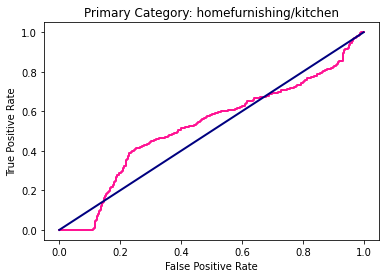

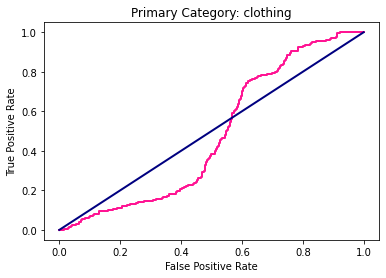

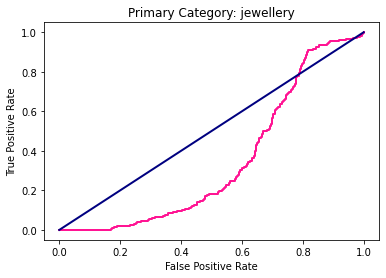

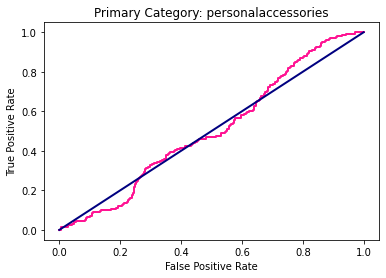

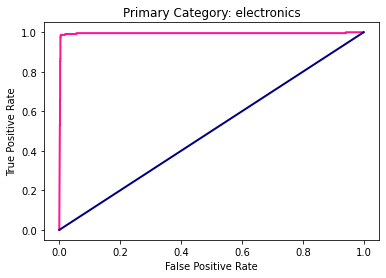

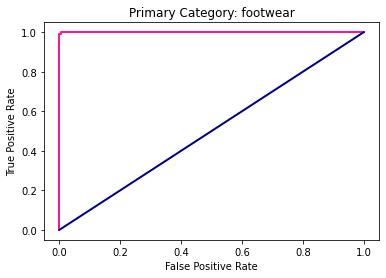

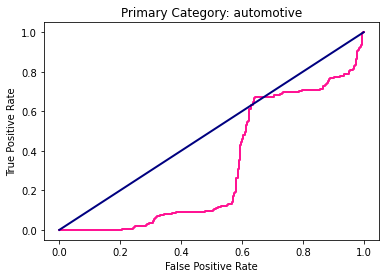

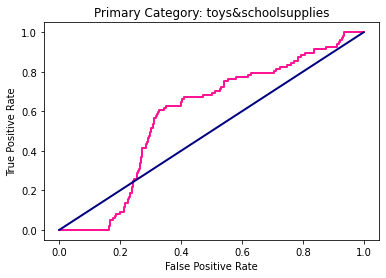

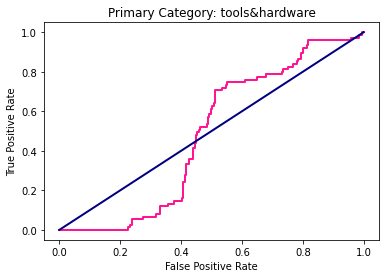

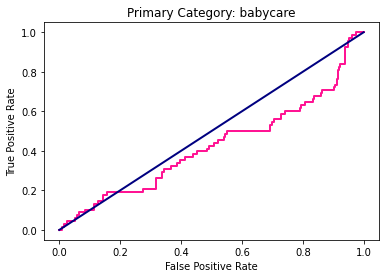

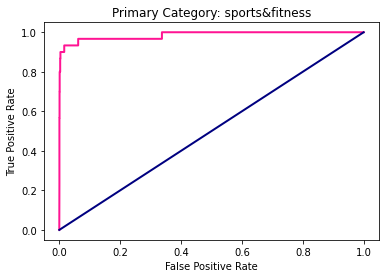

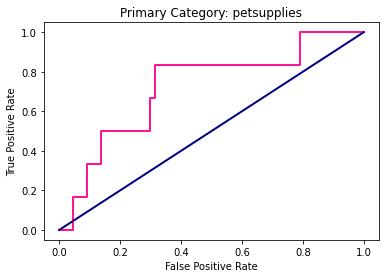

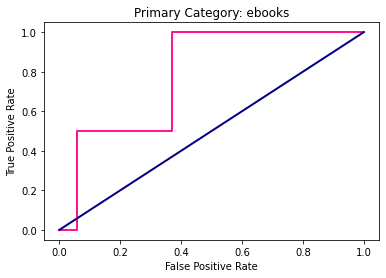

In [92]:
plot_roc_curve(y_test, lr_pred_prob)

In [93]:
#Average Area Under the Curve

auc = roc_auc_score(y_test, lr_pred_prob, multi_class='ovr')
print('Average AUC score for all the categories is {}'.format(auc))

Average AUC score for all the categories is 0.6268062895843679


In [94]:
#3) Evaluation using the Multinomial Naive Bayes Classifier

print("********** NAIVE BAYES CLASSIFIER **********")
y_test, nb_predict, nb_pred_prob = naive_bayes(x,y)

********** NAIVE BAYES CLASSIFIER **********
Validation Accuracy:  0.9046052631578947


*********** CONFUSION MATRIX **************
[[195   0   0   0   3   0   6   0   3   0   0   0   0]
 [  0   0  35   0   0   0  29   0   4   0   0   0   0]
 [  0   0 347   0   0   0   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   1   0   0   0   0]
 [  1   0   0   0 200   0   6   0  16   0   0   0   0]
 [  0   0   1   0   0 222   1   1   1   0   0   0   0]
 [  1   1   0   0   7   0 484   1   2   0   0   0   0]
 [  0   0   1   0   0   0   3 333   0   0   0   0   0]
 [  0   0   2   0   2   0  15   2 291   0   0   0   0]
 [  1   0   0   0   0   0   5   0   0   0   0   0   0]
 [  1   0   2   0   1   1   9   0  16   0   0   0   0]
 [  2   0   0   0   1   0  12   0   1   0   0  59   0]
 [  0   0   0   0   3   0  17   0   8   0   0   0  69]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.97   

In [95]:
#4) Evaluation using Linear Support Vector Machine

print("********* LINEAR SVM *********")
y_test, svm_predict = linear_svm(x,y)

********* LINEAR SVM *********
Validation Accuracy:  0.9740953947368421


*********** CONFUSION MATRIX **************
[[206   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0  60   1   0   0   0   4   0   2   0   0   0   1]
 [  0   4 348   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   1   0   0   1   0   0   0   0   0   0]
 [  2   0   0   0 221   0   0   0   0   0   0   0   0]
 [  0   0   1   0   1 223   0   0   1   0   0   0   0]
 [  0   6   0   0   5   0 479   0   2   0   1   1   2]
 [  0   0   0   0   0   0   1 335   1   0   0   0   0]
 [  0   0   1   0   1   0   3   0 303   0   3   0   1]
 [  0   0   0   0   0   0   0   0   0   5   0   0   1]
 [  0   0   1   0   0   0   0   0   2   0  27   0   0]
 [  0   0   0   0   0   0   3   0   0   0   0  71   1]
 [  0   0   0   0   1   0   3   0   2   0   1   0  90]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.99      1.00      0

In [96]:
#5) Evaluation using Decision Trees Classifier

print("********** DECISION TREES CLASSIFIER *************")
y_test, dtree_predict, dtree_pred_prob = decision_trees(x,y)

********** DECISION TREES CLASSIFIER *************
Validation Accuracy:  0.7454769736842105


*********** CONFUSION MATRIX **************
[[165   0   4   0   3   0   3   0   0   0  32   0   0]
 [ 13  36   6   0   1   0  11   0   1   0   0   0   0]
 [  5   6 320   0   0   5   5   0  10   0   1   0   1]
 [  1   0   0   0   0   0   1   0   0   0   0   0   0]
 [ 16   0   0   0 155   0  35   2   5   0   5   0   5]
 [  0   0   0   0  83 139   2   0   2   0   0   0   0]
 [ 83  42   7   0   2   0 334   5  11   0   0   8   4]
 [  0   0   1   0  30   0   4 298   3   0   0   0   1]
 [ 11   1   4   0  23   0  33   0 233   0   2   0   5]
 [  2   0   0   0   0   0   4   0   0   0   0   0   0]
 [  2   0   1   0   0   1  20   0   2   0   3   0   1]
 [  5   0   1   0   0   0   6   0   0   0   0  63   0]
 [  7   0   0   0   9   0  11   1   1   0   0   1  67]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0

In [97]:
#6) Evaluation using the Random Forest Classifier

print("********** RANDOM FOREST CLASSIFIER *************")
y_test, rfc_predict, rfc_pred_prob = random_forest(x,y)

********** RANDOM FOREST CLASSIFIER *************
Validation Accuracy:  0.9243421052631579


*********** CONFUSION MATRIX **************
[[198   0   0   0   0   0   7   0   2   0   0   0   0]
 [  0  25  14   0   0   0  27   0   2   0   0   0   0]
 [  0   0 341   0   0   2  10   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0   0   0   0   0]
 [  2   0   0   0 203   0  12   0   6   0   0   0   0]
 [  0   0   1   0   1 216   3   0   5   0   0   0   0]
 [  1   0   1   0   6   0 485   1   2   0   0   0   0]
 [  0   0   0   0   0   0   2 332   3   0   0   0   0]
 [  0   1   2   0   1   0  15   0 293   0   0   0   0]
 [  0   0   0   0   0   0   5   0   0   1   0   0   0]
 [  0   0   1   0   1   0   7   0   4   0  17   0   0]
 [  0   0   0   0   0   1   7   0   3   0   0  64   0]
 [  0   0   0   0   1   0  14   1   8   0   0   0  73]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.

In [98]:
#7) Evaluation using the K Nearest Neighbours Model

print("********** K NEAREST NEIGHBOURS *************")
y_test, knn_predict, knn_pred_prob = k_nearest_neighbours(x,y)

********** K NEAREST NEIGHBOURS *************
Validation Accuracy:  0.9449013157894737


*********** CONFUSION MATRIX **************
[[204   0   0   0   0   0   2   0   1   0   0   0   0]
 [  0  55   5   0   1   1   2   0   2   0   0   1   1]
 [  0  13 339   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   1   0   0   0   1   0   0   0   0   0]
 [  5   0   0   0 205  12   0   0   0   0   0   0   1]
 [  0   0   0   0   0 222   0   2   2   0   0   0   0]
 [  1   3   0   0   7   4 464   8   1   0   2   4   2]
 [  0   0   0   0   0   0   1 335   1   0   0   0   0]
 [  0   0   1   0   0  11   2   2 292   0   3   0   1]
 [  0   0   0   0   0   0   1   0   0   4   0   0   1]
 [  1   0   1   0   0   1   0   0   5   0  22   0   0]
 [  1   0   0   0   1   0   4   0   0   0   0  68   1]
 [  1   0   0   0   2   0   2   1   4   0   0   0  87]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.96  

Conclusion from Amazon Dataset:

Under Unbalanced data,Linear Support vector machine model has the highest accuracy with 97.8%

Under Oversampled data,Linear Support vector machine model has the highest accuracy with 99.2%

Under Undersampled data,Linear Support vector machine model has the highest accuracy with 97.4%

So,Finally we can select the Oversampled Amazon Dataset.

In [99]:
#Matching the Retail and Discount Prices of both datasets
oversampled_df.head()

,Unnamed: 0,Product name in Flipkart,product_category_tree,Retail Price in Flipkart,Discounted Price in Flipkart,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
0,5417,Alex's Barbie Series Barbie Doll Art Plastic P...,"[""Toys & School Supplies >> School Supplies >>...",799.0,299.0,Flipkart.com: Buy Alex's Barbie Series Barbie ...,NaN,toys&schoolsupplies,1,0.225000,195,flipkartcom buy ale barbie series barbie doll ...
1,13643,Platignum Carnaby Street Ball Pen,"[""Pens & Stationery >> Pens >> Ball Pens >> Pl...",695.0,695.0,Platignum Carnaby Street Ball Pen (Blue)\n ...,Platignum,toys&schoolsupplies,1,0.362835,1420,platignum carnaby street ball pen blue price c...
2,6316,Aardee Varsity Design Art Thick fabric Pencil Box,"[""Toys & School Supplies >> School Supplies >>...",350.0,299.0,Aardee Varsity Design Art Thick fabric Pencil ...,NaN,toys&schoolsupplies,1,0.016667,207,aardee varsity design art thick fabric pencil ...
3,5429,Outshiny Eagle Printed Art Polyester Pencil Box,"[""Toys & School Supplies >> School Supplies >>...",199.0,149.0,Outshiny Eagle Printed Art Polyester Pencil Bo...,NaN,toys&schoolsupplies,1,0.330000,786,outshiny eagle printed art polyester pencil bo...
4,5206,Starmark BTS Flowers Art Polyester Pencil Box,"[""Toys & School Supplies >> School Supplies >>...",179.0,99.0,Flipkart.com: Buy Starmark BTS Flowers Art Pol...,NaN,toys&schoolsupplies,1,0.225000,184,flipkartcom buy starmark bts flower art polyes...


In [101]:
oversampled_df_1.head()

,Unnamed: 0,Product name in Amazon,product_category_tree,Retail Price in Amazon,Discounted Price in Amazon,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
0,5418,Alex's Barbie Series Barbie Doll Art Plastic P...,"[""Toys & School Supplies >> School Supplies >>...",792,385,Flipkart.com: Buy Alex's Barbie Series Barbie ...,NaN,toys&schoolsupplies,1,0.225000,195,flipkartcom buy ale barbie series barbie doll ...
1,13644,Platignum Carnaby Street Ball Pen,"[""Pens & Stationery >> Pens >> Ball Pens >> Pl...",690,795,Platignum Carnaby Street Ball Pen (Blue)\n ...,Platignum,toys&schoolsupplies,1,0.362835,1420,platignum carnaby street ball pen blue price c...
2,6317,Aardee Varsity Design Art Thick fabric Pencil Box,"[""Toys & School Supplies >> School Supplies >>...",343,349,Aardee Varsity Design Art Thick fabric Pencil ...,NaN,toys&schoolsupplies,1,0.016667,207,aardee varsity design art thick fabric pencil ...
3,5430,Outshiny Eagle Printed Art Polyester Pencil Box,"[""Toys & School Supplies >> School Supplies >>...",187,169,Outshiny Eagle Printed Art Polyester Pencil Bo...,NaN,toys&schoolsupplies,1,0.330000,786,outshiny eagle printed art polyester pencil bo...
4,5207,Starmark BTS Flowers Art Polyester Pencil Box,"[""Toys & School Supplies >> School Supplies >>...",178,116,Flipkart.com: Buy Starmark BTS Flowers Art Pol...,NaN,toys&schoolsupplies,1,0.225000,184,flipkartcom buy starmark bts flower art polyes...


In [102]:
#Dropping the columns which are not required
oversampled_df=oversampled_df.drop(['Unnamed: 0', 'product_category_tree','description','brand','primary_categories','main_category','desc_pol','desc_len','cleaned_desc'], axis=1)
oversampled_df_1=oversampled_df_1.drop(['Unnamed: 0', 'product_category_tree','description','brand','primary_categories','main_category','desc_pol','desc_len','cleaned_desc'], axis=1)

In [103]:
oversampled_df.head()

,Product name in Flipkart,Retail Price in Flipkart,Discounted Price in Flipkart
0,Alex's Barbie Series Barbie Doll Art Plastic P...,799.0,299.0
1,Platignum Carnaby Street Ball Pen,695.0,695.0
2,Aardee Varsity Design Art Thick fabric Pencil Box,350.0,299.0
3,Outshiny Eagle Printed Art Polyester Pencil Box,199.0,149.0
4,Starmark BTS Flowers Art Polyester Pencil Box,179.0,99.0


In [104]:
oversampled_df_1.head()

,Product name in Amazon,Retail Price in Amazon,Discounted Price in Amazon
0,Alex's Barbie Series Barbie Doll Art Plastic P...,792,385
1,Platignum Carnaby Street Ball Pen,690,795
2,Aardee Varsity Design Art Thick fabric Pencil Box,343,349
3,Outshiny Eagle Printed Art Polyester Pencil Box,187,169
4,Starmark BTS Flowers Art Polyester Pencil Box,178,116


In [112]:
result = pd.concat([oversampled_df, oversampled_df_1], axis=1, join="inner")
result.head(15)

,Product name in Flipkart,Retail Price in Flipkart,Discounted Price in Flipkart,Product name in Amazon,Retail Price in Amazon,Discounted Price in Amazon
0,Alex's Barbie Series Barbie Doll Art Plastic P...,799.0,299.0,Alex's Barbie Series Barbie Doll Art Plastic P...,792,385
1,Platignum Carnaby Street Ball Pen,695.0,695.0,Platignum Carnaby Street Ball Pen,690,795
2,Aardee Varsity Design Art Thick fabric Pencil Box,350.0,299.0,Aardee Varsity Design Art Thick fabric Pencil Box,343,349
3,Outshiny Eagle Printed Art Polyester Pencil Box,199.0,149.0,Outshiny Eagle Printed Art Polyester Pencil Box,187,169
4,Starmark BTS Flowers Art Polyester Pencil Box,179.0,99.0,Starmark BTS Flowers Art Polyester Pencil Box,178,116
5,Tuelip Art Superfine Nib Sketch Pens,899.0,499.0,Tuelip Art Superfine Nib Sketch Pens,881,618
6,PTC Mart Unimass Cartoon Art Nilon Pencil Box,650.0,300.0,PTC Mart Unimass Cartoon Art Nilon Pencil Box,636,371
7,AMY White Cool Car A5 Notebook Spiral Bound,999.0,250.0,AMY White Cool Car A5 Notebook Spiral Bound,997,299
8,Neo Gold Leaf Fancy School Art Plastic Pencil Box,299.0,199.0,Neo Gold Leaf Fancy School Art Plastic Pencil Box,287,253
9,Pack N Buy 4 Compartments Plastic Stationary H...,850.0,652.0,Pack N Buy 4 Compartments Plastic Stationary H...,845,728
